# Task_3: Design and Deploy Model using Azure Machine Learning


## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

## TARGETED GRADE: PASS(P)

# QUESTION 1:

#### What is the Azure Machine Learning SDK for Python? What is Workspace? How to create a workspace for machine learning using Azure Portal? You need to log in using your Deakin email to your Azure portal and create a workspace under your resource group. We have created a resource group using university subscription and you should be able to see your resource group. Provide a screenshot for this part. Create your computing instance and cluster and explain what those parts are. Provide a screenshot of your created computing instance and cluster.


## What is the Azure Machine Learning SDK for Python? 


Azure Machine Learning Software Development Kit (AzureML SDK) has a set of Python packages with which models are built, trained, deployed, and managed on the Azure cloud platform. It has a set of tools and APIs that actually helps to streamline the end-to-end ML workflow that is from data preparation to model deployment and monitoring.


There are some key components of the AzureML SDK: 

- AzureML Workspace, 
- Experimentation, 
- Data Preparation, 
- Model Training, 
- Model Deployment and 
- Model Monitoring.


## 1. IMPORTING THE NECCESSARY LIBRARIES:

In [1]:
# To connect to the Azure ML resource
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# To read the local environment variables and secret keys
import os, dotenv
from dotenv import load_dotenv, find_dotenv

# To track the model using Azure MLStudio
import mlflow
import mlflow.sklearn

import joblib

# Importing 'Pandas'
import pandas as pd

# Importing 'Numpy'
import numpy as np

# Import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
# import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image


from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

from sklearn.metrics import mean_squared_error


import joblib
import zipfile

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the images using **IPython.display** library modules.


from IPython.display import Image as img

## What is Workspace? How to create a workspace for machine learning using Azure Portal? 

AzureML Workspace is a centralized location where all the machine learning activities take place. It is an environment where the data scientists, data engineers, and stake holders work together. Also its where we can store our resources like datasets, models, experiments, and compute resources.

### Step 1: Log in to the Azure portal using the credentials.

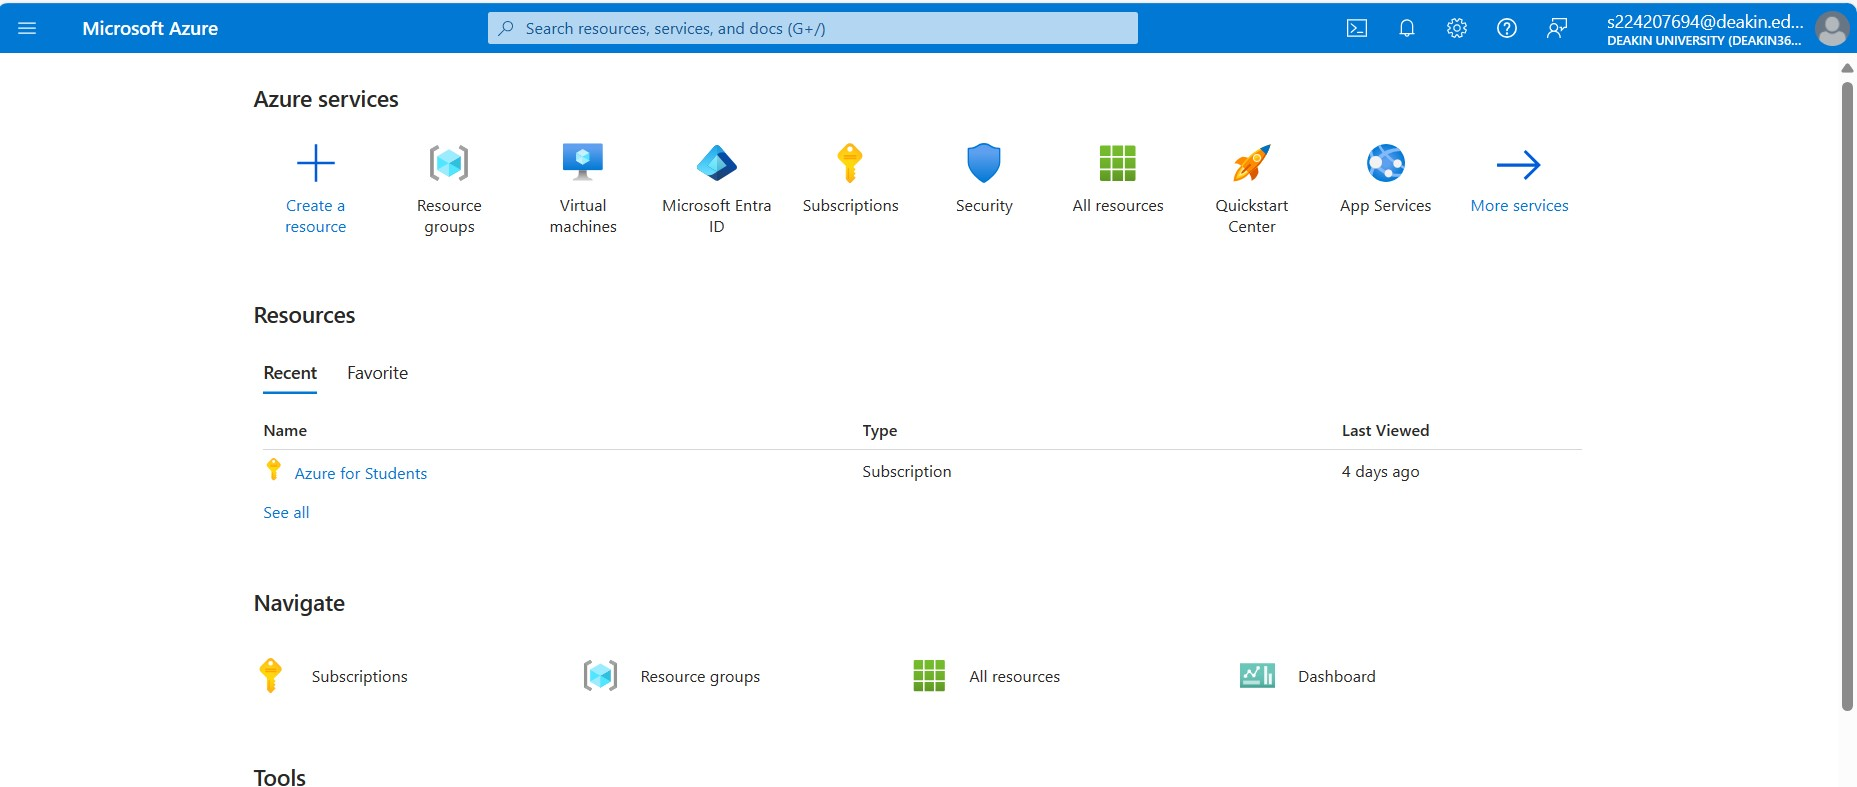

In [3]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\AP1.jpg')

Azure for Students is the subscription with 100 credits developed by the university for the students to create the resource groups, workspace, develop and deploy the model and perform all the machine learning activities.

### Step 2: Click on the Resource-group icon available as seen in the above image.

### Step 3: Click on the "Create" button as seen in the below image.

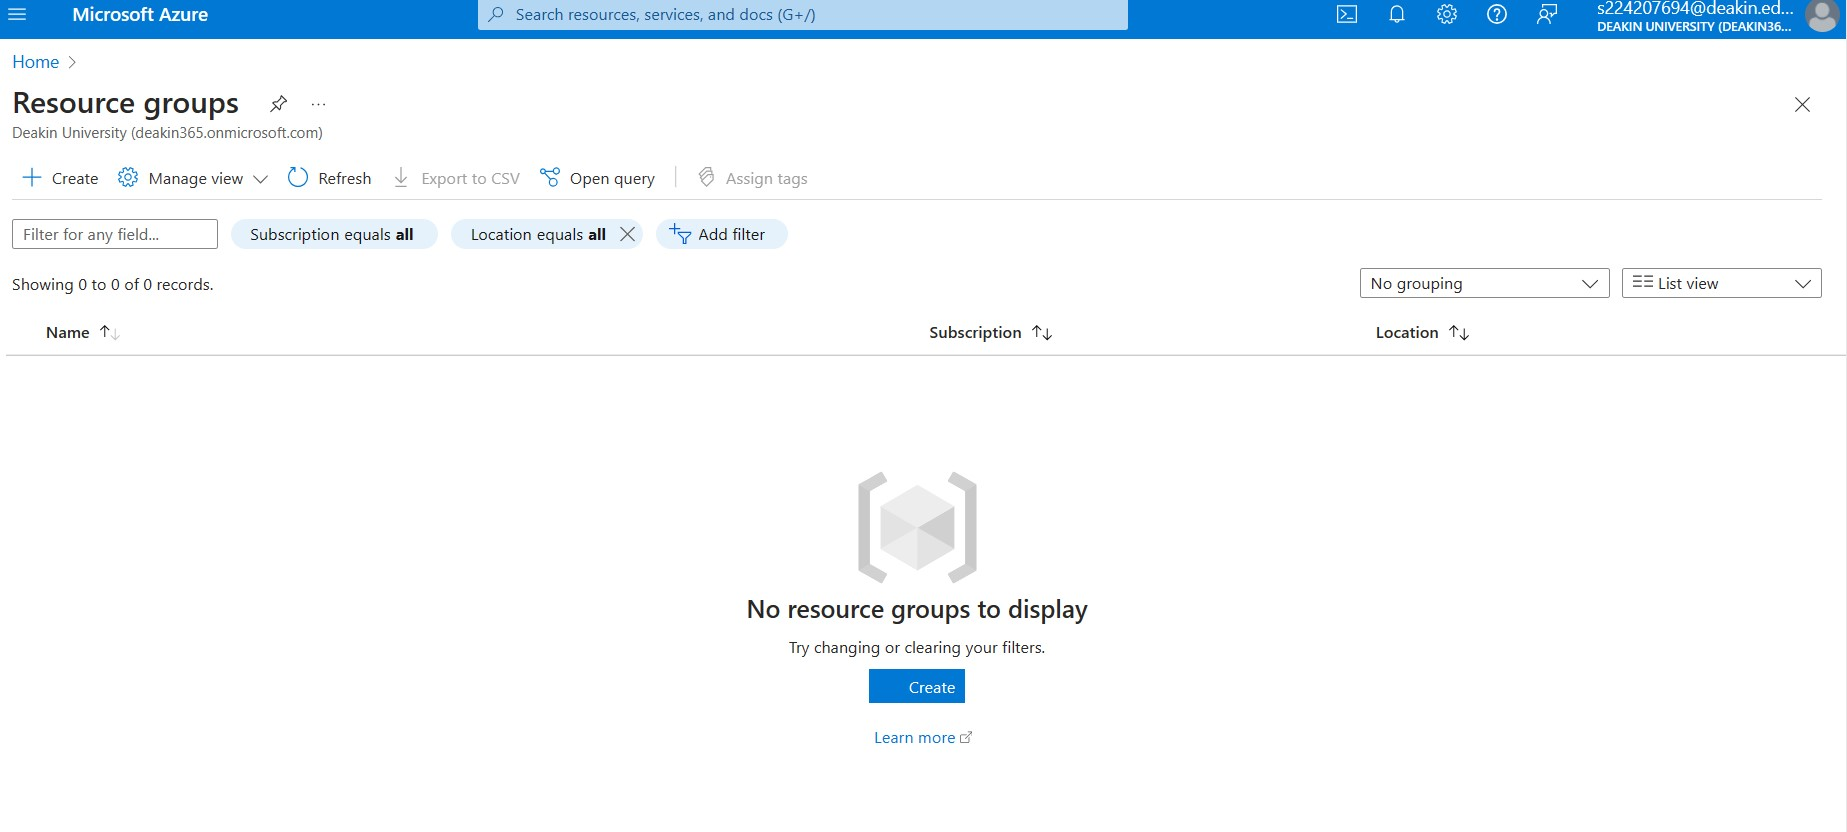

In [4]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\RG1.jpg')

### Step 4: The resource group name is given as “rg-t3” and the Region is set to “East-US”. Now “Review+Create” must be clicked.

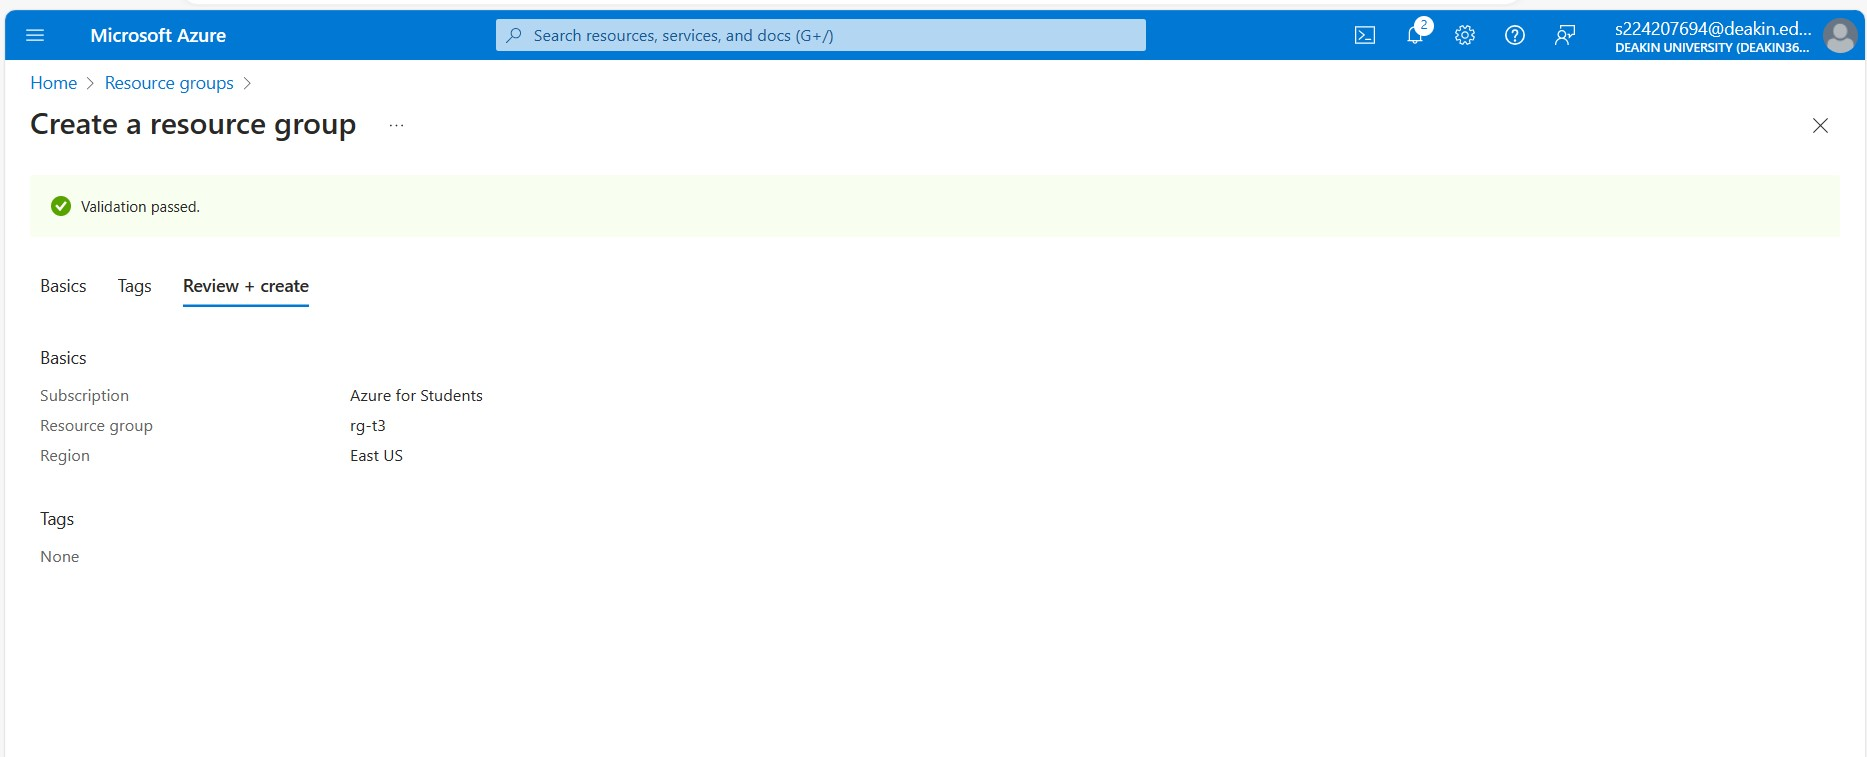

In [5]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\RG2.jpg')

### Step 5: Click on "+Create" button on the left side of the Resource Group.

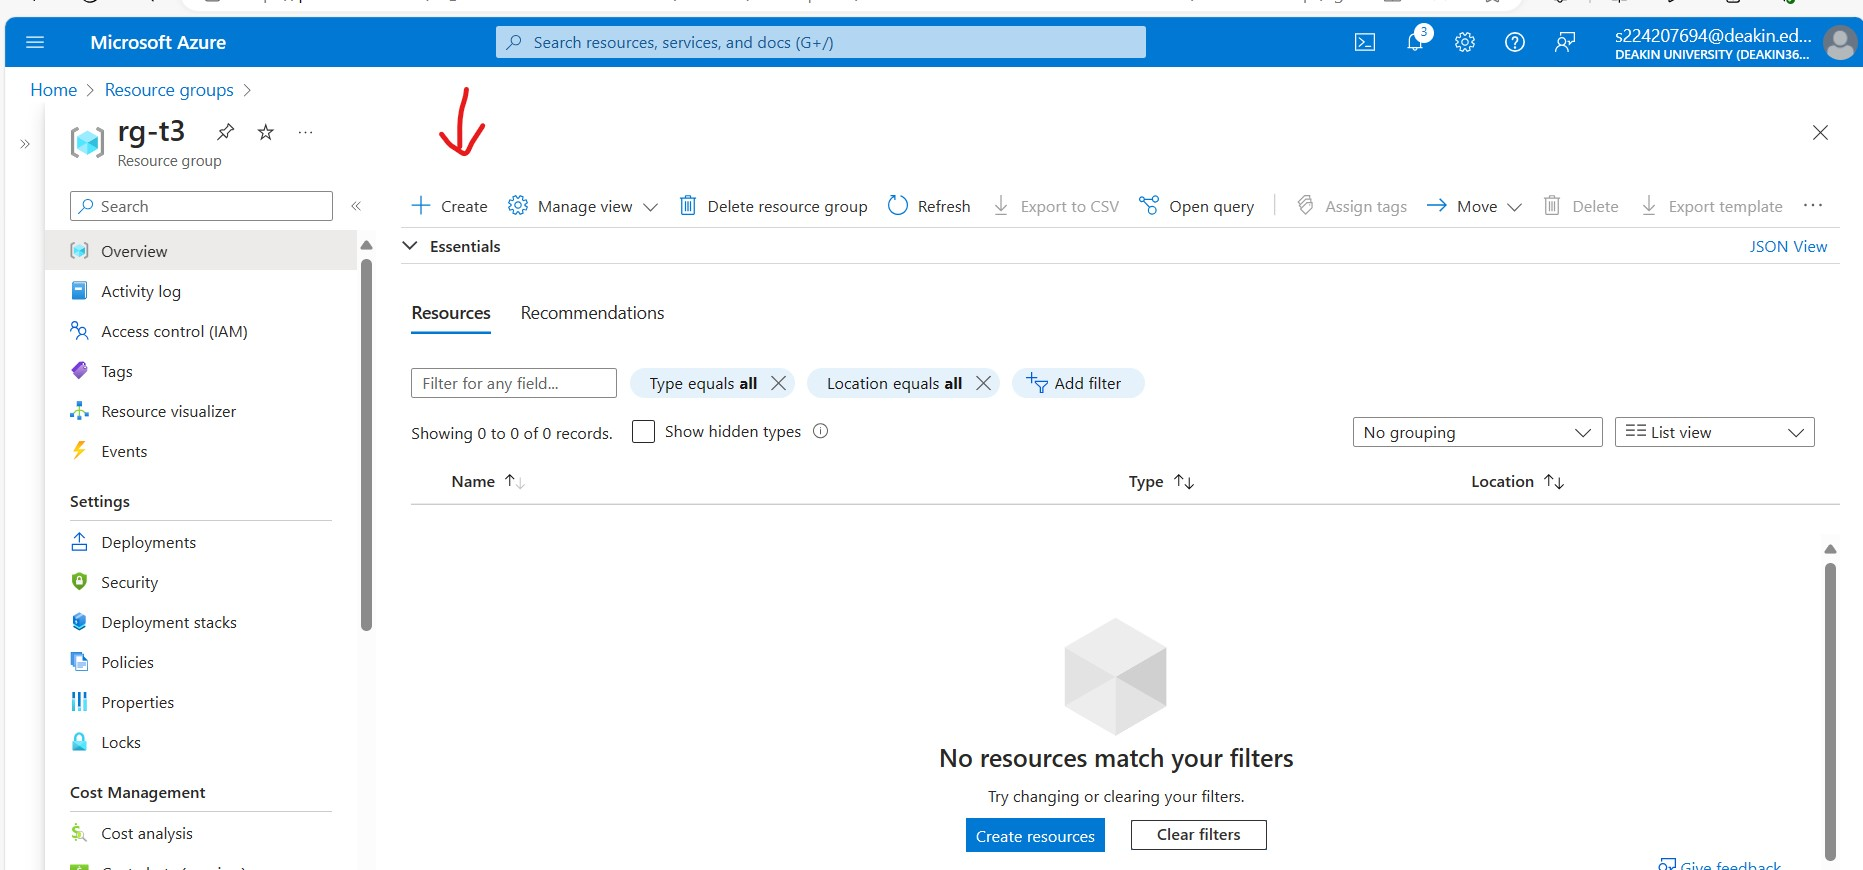

In [6]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\RG3.jpg')

### Step 6: When we click on “Create” option available on the above image. It goes to a Marketplace where we have to search for “Azure Machine Learning” and click on that.

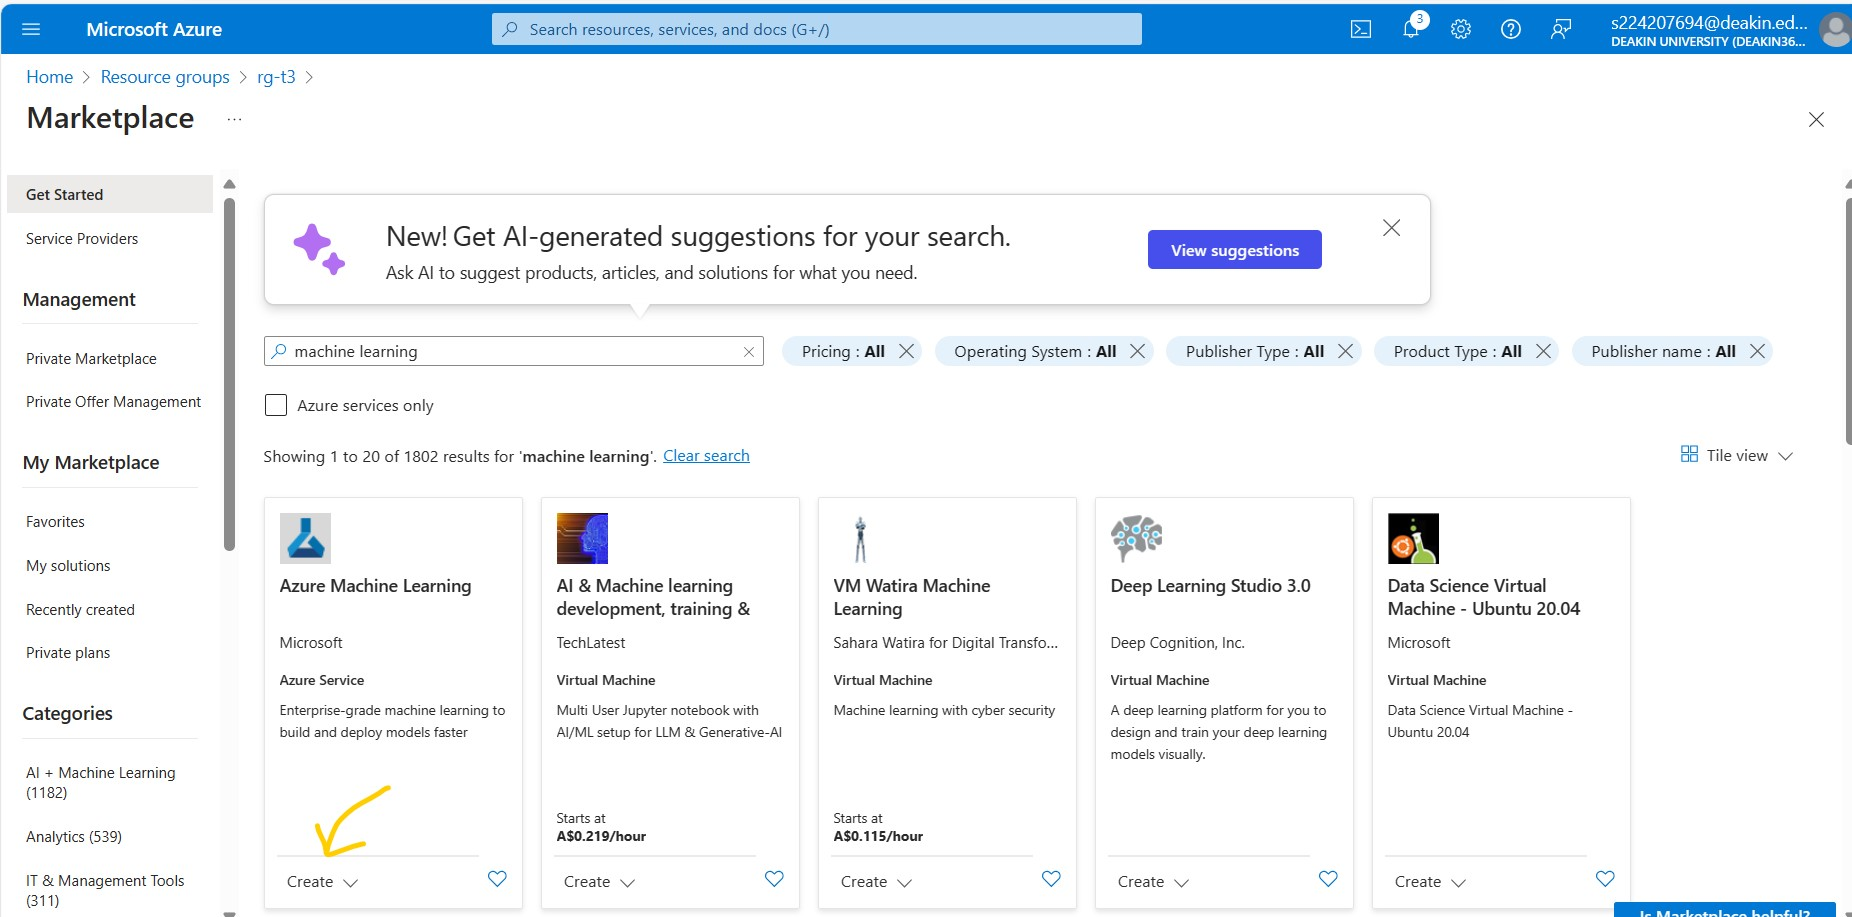

In [7]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\RG4.jpg')

### Step 7: Once Create button is clicked, then a name for workspace with a name “my-ws” is given and the Region is set to “East-US”.

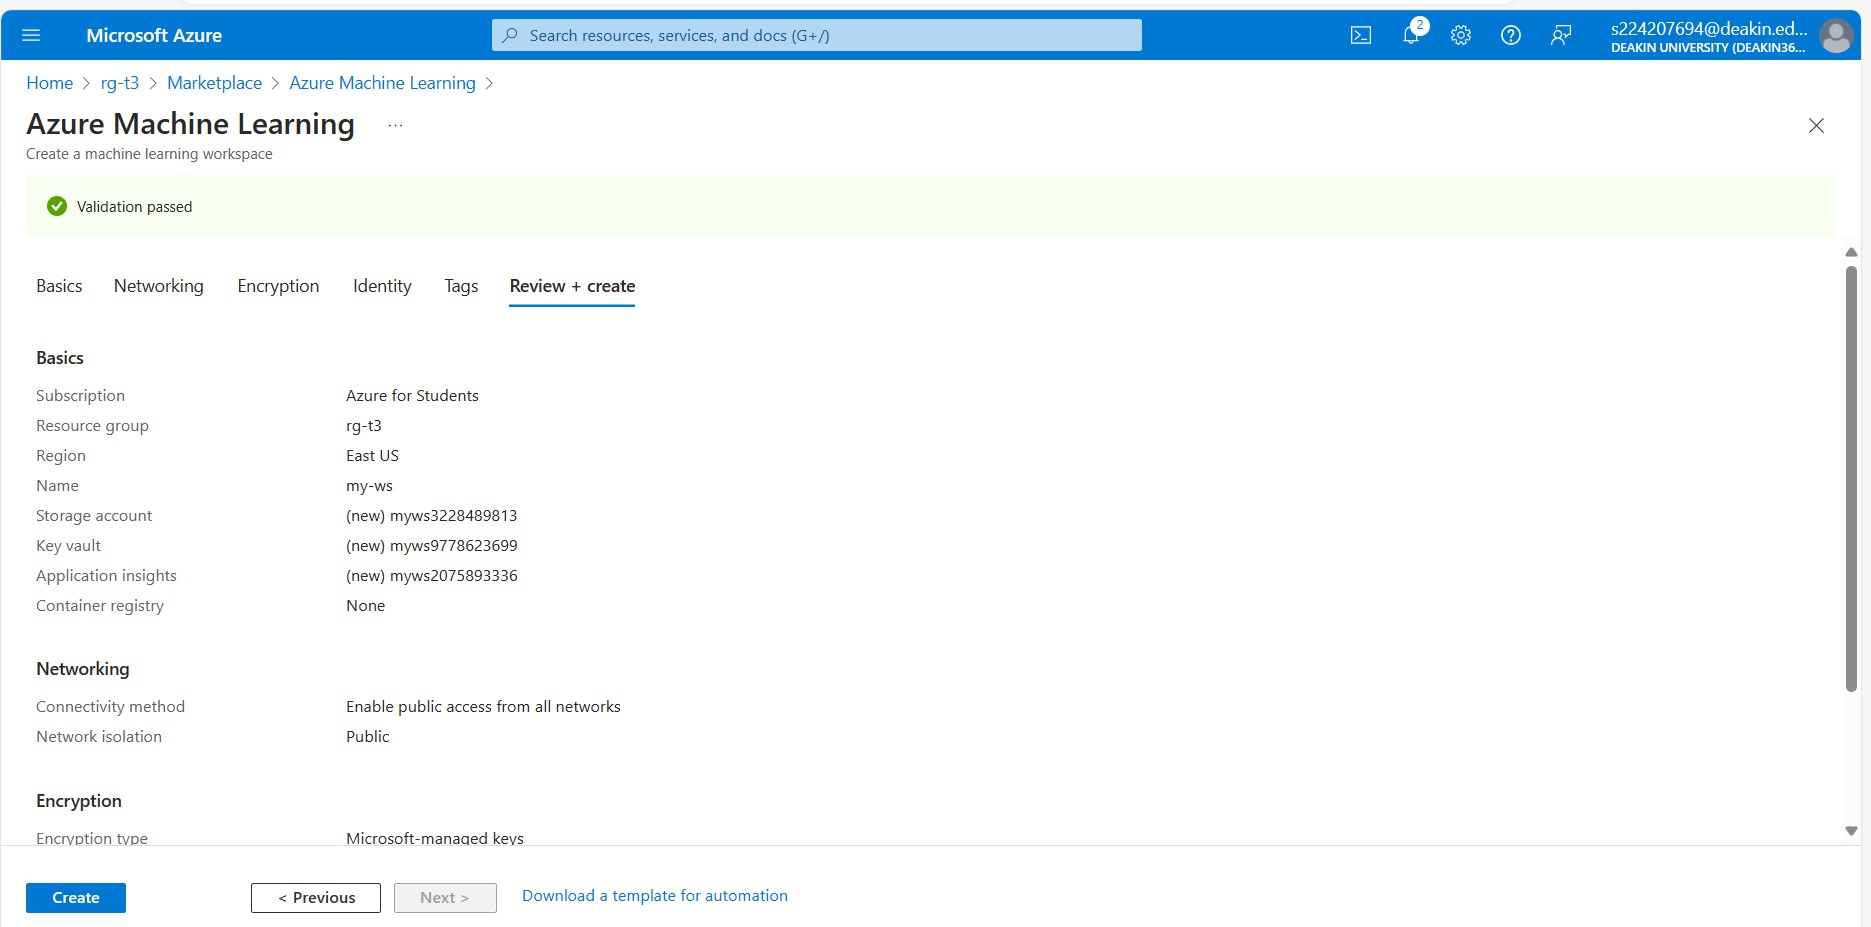

In [8]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\WS1.jpg')

### Step 8: Once “Review+Create” is clicked and then “Create” is clicked, the deployment process begins and few minutes later, the process is over.

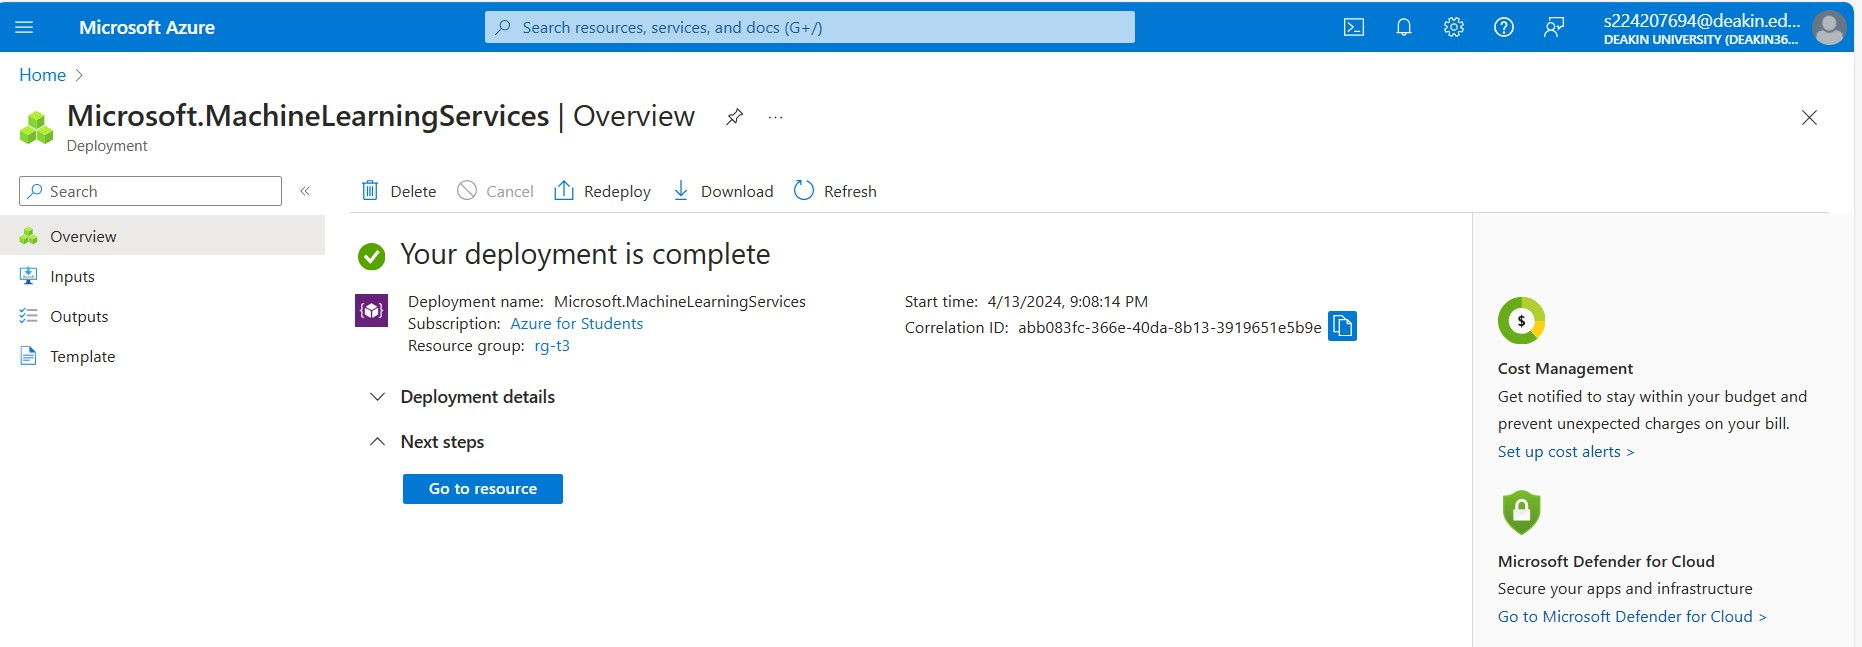

In [10]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\WS2.jpg')

# Access the Workspace:

### Step 9: To dowload the config.json file for the resource from the Portal.

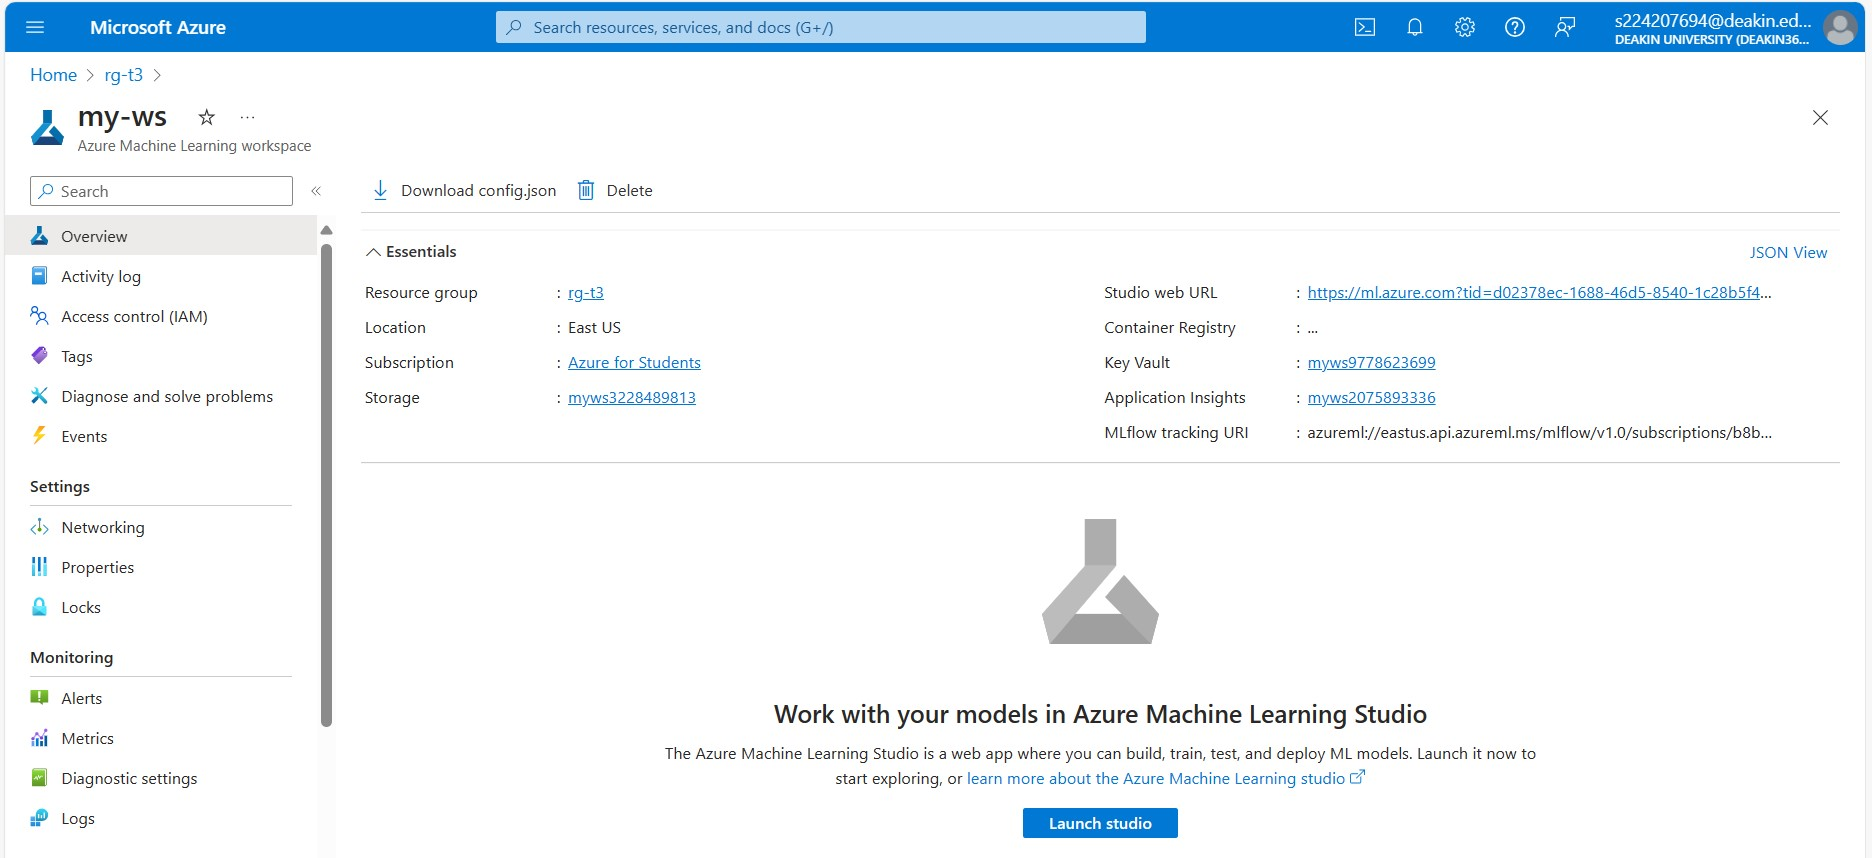

In [11]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\WS.jpg')

In [12]:
# Read the config.json file to connect to your workspace from local notebook
from azureml.core import Workspace
ws = Workspace.from_config()


### Using the config.json file to access the workspace in Azure.

### Step 10: Copying and Pasting the Tenant ID to connect to Microsoft CLI.

We can locate the Tenant ID from the Microsoft Entra.

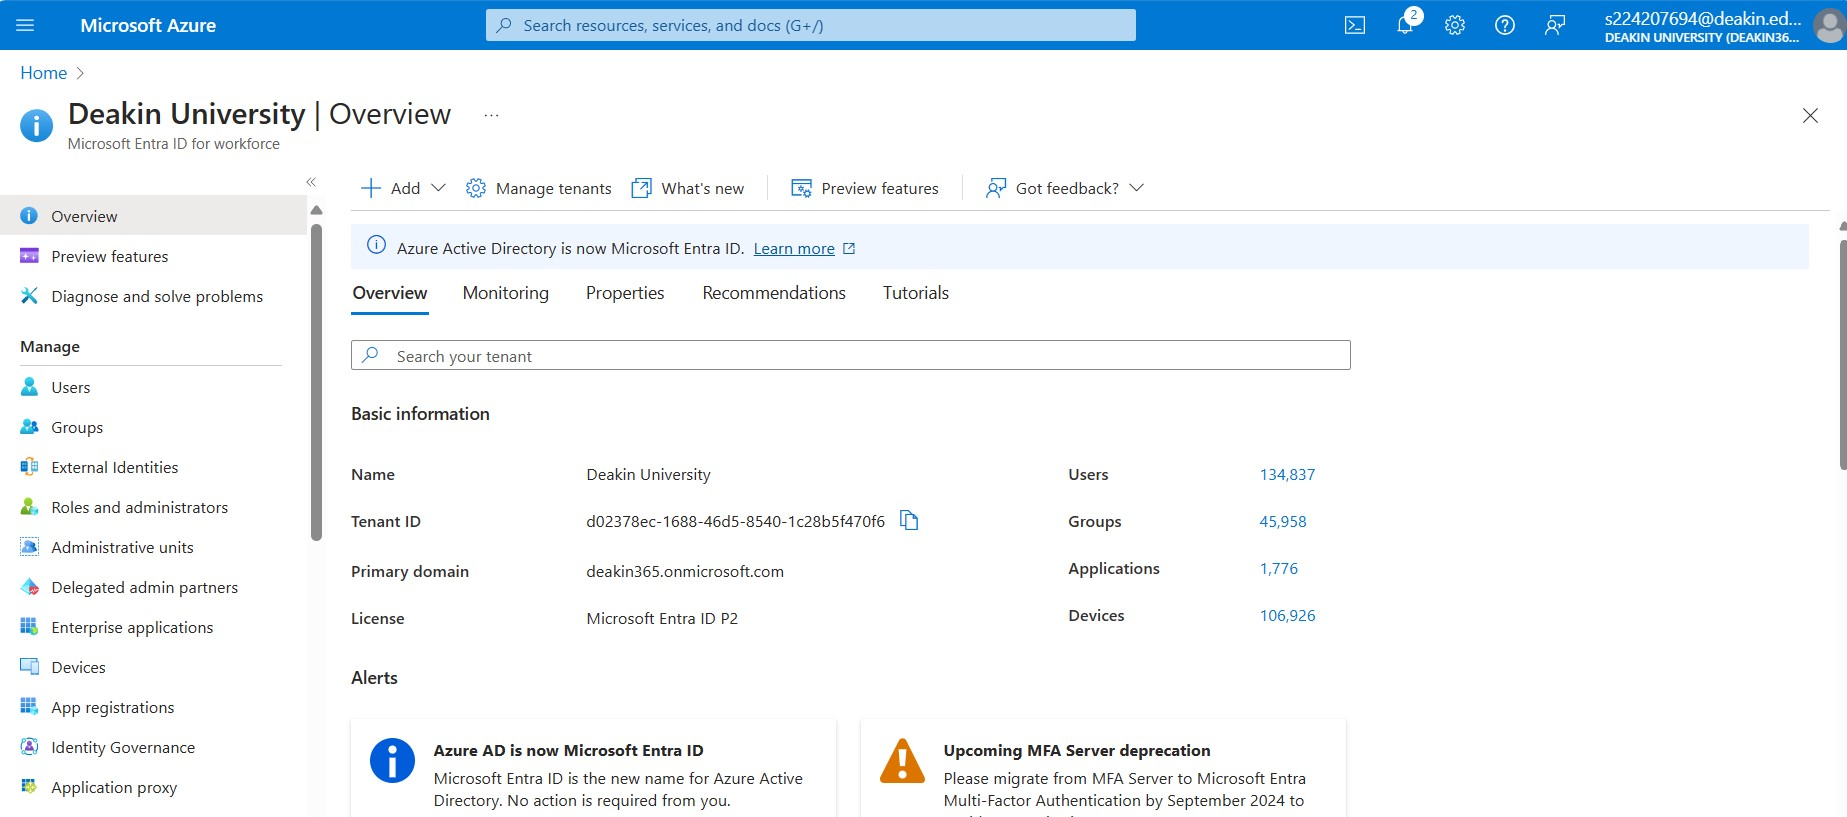

In [13]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\ME.jpg')

In [14]:
# Authenticate your tenant to connect to Microsoft CLI
from azureml.core.authentication import InteractiveLoginAuthentication
interactive_auth = InteractiveLoginAuthentication(tenant_id="d02378ec-1688-46d5-8540-1c28b5f470f6")

### Step 11: Importing the neccessary libraries to access the workspace from Azure ML.

### Step 12: Providing the workspace details.

### Step 13: To create compute instance.

## What is Computing Instance and Compute Cluster? How to create a Compute Cluster?


### Computing Instance:

A compute instance refers to a virtual machine (VM) that provides a scalable and flexible environment for data science tasks, model development, and experimentation. Compute instances are used to run notebooks, execute Python scripts, and interactively develop and test machine learning models within Azure ML.

###  Compute Cluster:

A compute cluster is a group of virtual machines (VMs) that are used to distribute and parallelize compute-intensive tasks such as training machine learning models, hyperparameter tuning, and batch inferencing.

In [15]:
### Importing the neccessary libraries to access the workspace from Azure ML.
import os
import azure.core
from azureml.core import Workspace, Environment, Experiment, ScriptRunConfig
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

In [16]:
# Creating the compute cluster:

# Mentioning the resource name and workspace name from azure portal.
resource_name = "rg-t3"
workspace_name = "my-ws"
subscription_id = "b8b04be1-8ca0-496a-bed6-50c58c15784d"
aml_compute_target = "cluster"
experiment_name  = "kidneydisease-sdk"

### A Compute Cluster is created based on the following configurations.

In [17]:
try:
    aml_compute = AmlCompute(ws, aml_compute_target)
    print("Compute Target Already Exists!!")
except ComputeTargetException:
    print("Create a new compute target:",aml_compute_target)
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = "Standard_D2_V3", 
                                                                min_nodes = 1, 
                                                                max_nodes = 4, 
                                                                idle_seconds_before_scaledown = 3000)
    aml_compute = ComputeTarget.create(ws, aml_compute_target, provisioning_config)
    aml_compute.wait_for_completion(show_output = True, min_node_count = None, timeout_in_minutes = 20)
    
print("Azure Machine Learning - Compute Instance Created for the workspace and experiment")

Create a new compute target: cluster
InProgress..
SucceededProvisioning operation finished, operation "Succeeded"
Succeeded...................................
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned
Azure Machine Learning - Compute Instance Created for the workspace and experiment


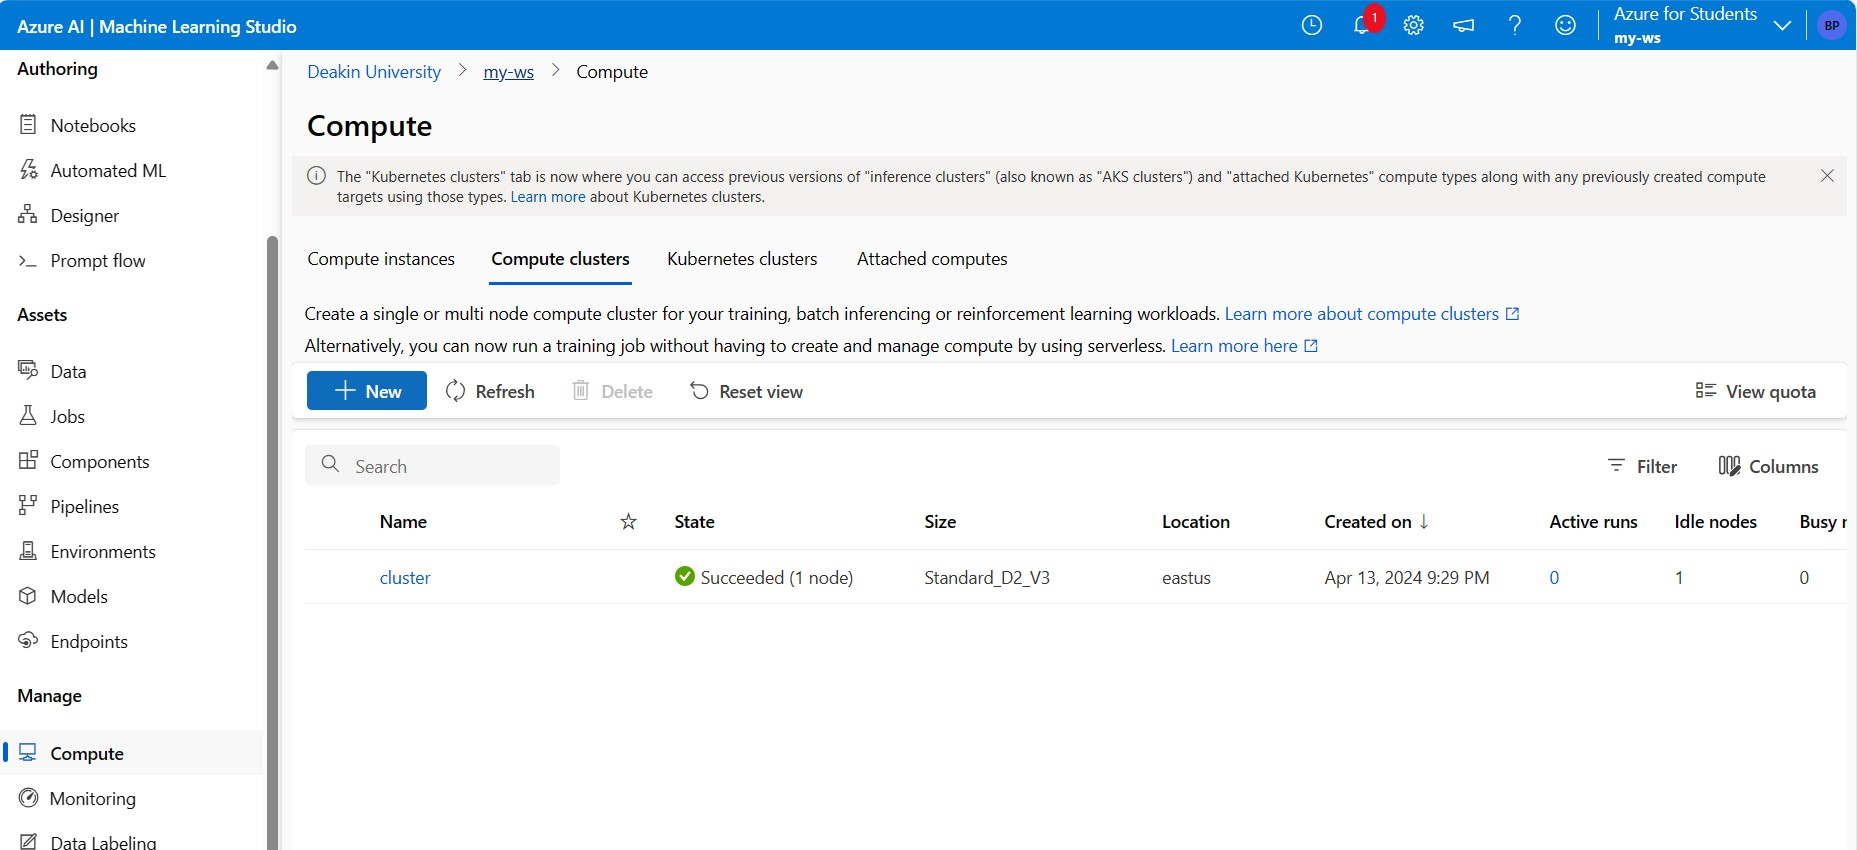

In [18]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\CC.jpg')

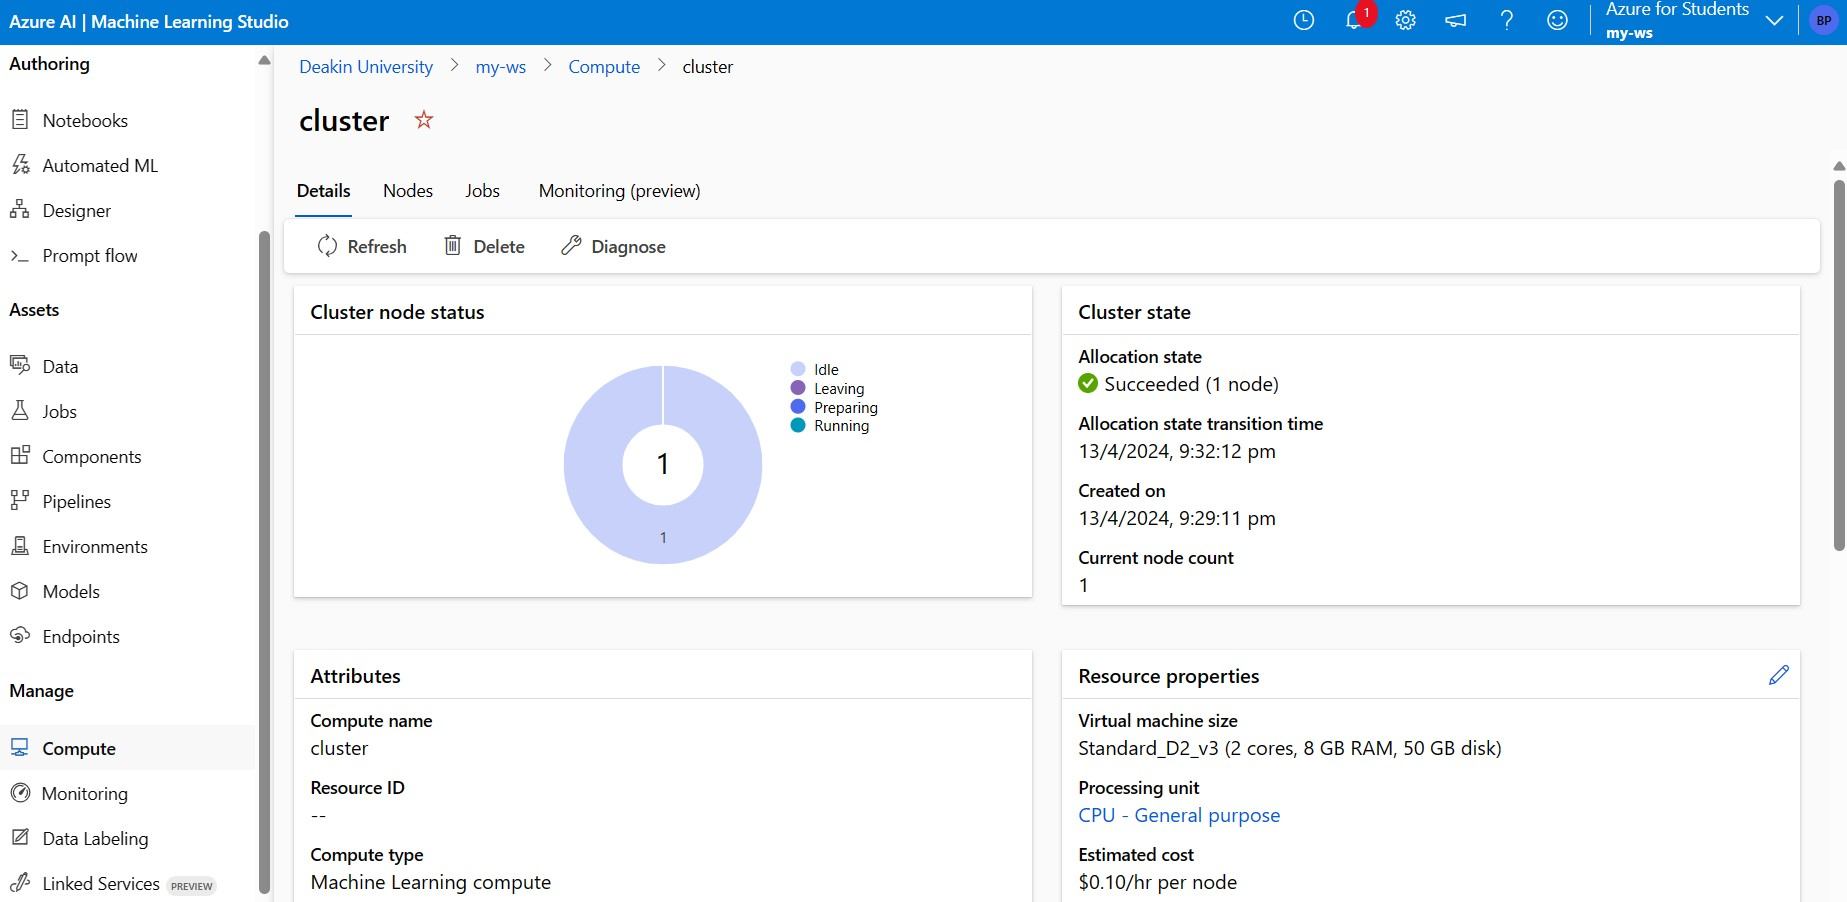

In [19]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\CC1.jpg')

### Azure Python SDK and Compute Target:

The Azure ML Python SDK itself doesn't require a specific compute target to run.
You can use it to write your training scripts locally.
However, to train your model, you need to specify a compute target within your script. This could be your local machine or an Azure-based compute target. 

### Choosing the Right Instance:

The best choice depends on your specific needs:


For small datasets and experimentation, a local machine or an Azure Machine Learning Compute Instance can be sufficient.
For larger datasets, complex models, or long-running training jobs, using a more powerful Azure VM instance (like Standard_F series) might be necessary.

### Creating a New Experiment:

In [22]:
from azureml.core import Experiment
experiment = Experiment(workspace = ws, name="kidneydisease-sdk")

In [23]:
# set name for logging
mlflow.set_experiment("kidneydisease-sdk")
# enable autologging with MLflow
mlflow.sklearn.autolog()

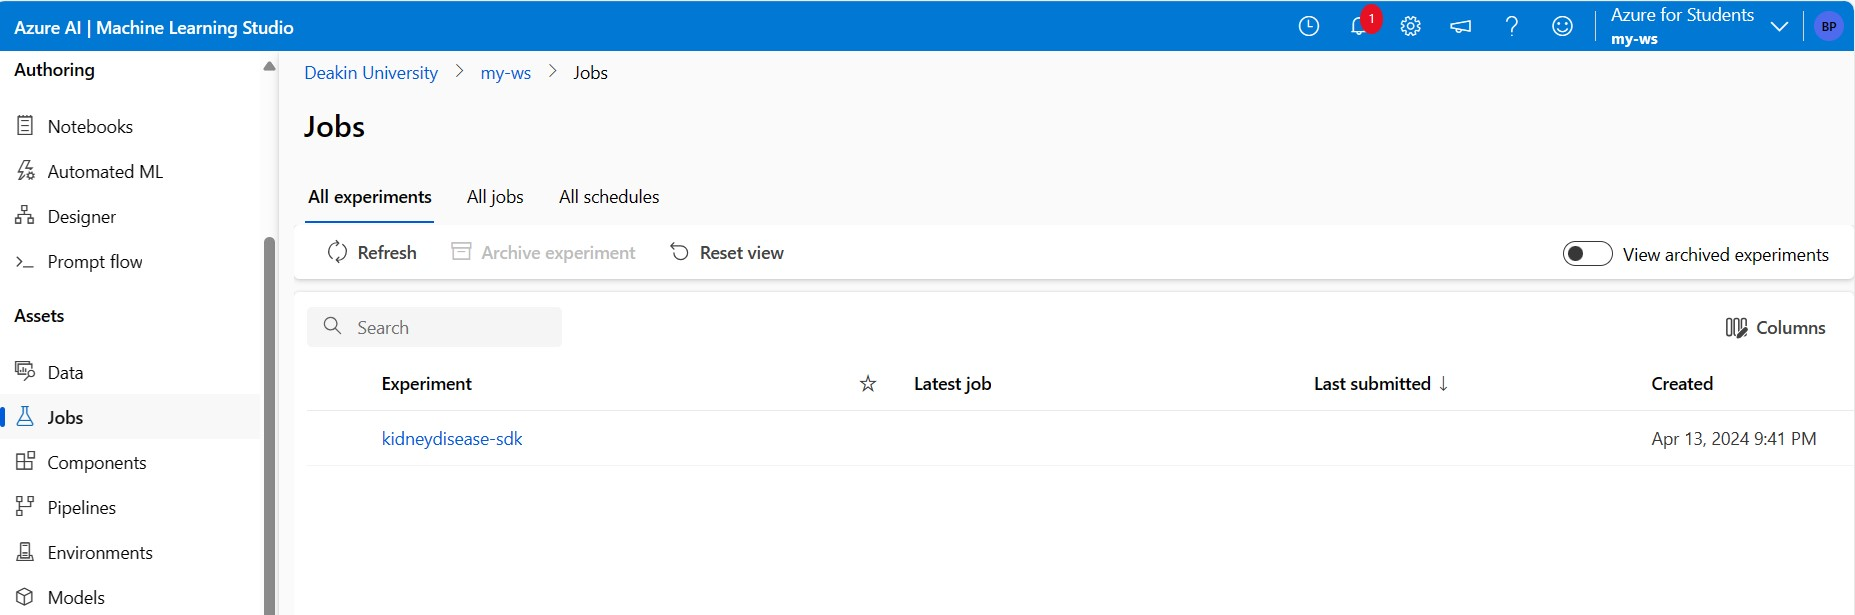

In [24]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP_BEG.jpg')

# QUESTION 2:

#### You need to use Azure Machine learning Python SDK to train and deploy your best built model (Decision tree or Random Forest) in part1. To complete this task you need to login to your Azure Portal and create your workspace for machine learning and then train your model (you can use the model you built in week 2 or train a new model using your selected dataset) and then deploy the model on Azure. You need to provide a screenshot of your built workspace, the built model using Python and how you have deployed the model using Azure Python SDK and dependencies. Every step of the development and deployment should be explained.

A model is created for the chronic kidney disease dataset given in task1. This dataset has information of patients of a nearby hospital collected for a 2 months period. This dataset is used to detect the early stage of chronic kidney disease. This dataset has 400 entries having 24 feature columns and one 'id' column and one 'class' column.
The dataset is downloaded from the following link: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
This dataset is zipped twice and then it is extracted twice, then the file with name “chronic_kidney_disease_full.arff” is converted into csv using the below link:  https://pulipulichen.github.io/jieba-js/weka/arff2csv/


1.	The final csv file is saved with the name "ckd_data_df.csv". This dataset has 400 entries and 24 feature columns, 1 id column and 1 class column.

2.	The 26 features are: 


**id(id), age(age), blood pressure(bp), specific gravity(sg), albumin(al), sugar(su), red blood cells(rbc), pus cell(pc), pus cell clumps(pcc), bacteria(ba), blood glucose random(bgr), blood urea(bu), serum creatinine(sc), sodium(sod), hemoglobin(hemo), packed cell volume(pcv), white blood cells count(wbcc), red blood cells count(rbcc), hypertension(htn), diabetes mellitus(dm), coronary artery disease (cad), appetite(appet), pedal edema(pe), anemia(ane), class(class).**



3. The class has features like ckd, notckd that ie ckd - chronic kidney disease, notckd - not chronic kidney disease.

4. The class label with values (ckd and notckd) is the output column.

5. There are some numerical columns and categorical columns that has **?** as a value in it. This dataset needs cleaning.

6. The dataset then has to be divided into train and test and train data is set into dtree classifier. The model is tested with test data.


In [25]:
data = []
with open('ckd_data_df.csv', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['id','age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class']
    
df = pd.DataFrame(data[1:], columns=names)

#### The column names are then splitted with a comma(,). Then the data is fed into pandas dataframe.

## DATA EXPLORATION:

In [26]:
df.head()

id age  bp     sg al su     rbc        pc         pcc          ba  bgr  bu  \
0  1  48  80   1.02  1  0       ?    normal  notpresent  notpresent  121  36   
1  2   7  50   1.02  4  0       ?    normal  notpresent  notpresent    ?  18   
2  3  62  80   1.01  2  3  normal    normal  notpresent  notpresent  423  53   
3  4  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  56   
4  5  51  80   1.01  2  0  normal    normal  notpresent  notpresent  106  26   

    sc  sod  pot  hemo pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  1.2    ?    ?  15.4  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  0.8    ?    ?  11.3  38  6000    ?   no   no  no  good   no   no   ckd  
2  1.8    ?    ?   9.6  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  3.8  111  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  1.4    ?    ?  11.6  35  7300  4.6   no   no  no  good   no   no   ckd

In [27]:
df.drop('id', axis=1, inplace=True)

In [28]:
df.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  bu  \
0  48  80   1.02  1  0       ?    normal  notpresent  notpresent  121  36   
1   7  50   1.02  4  0       ?    normal  notpresent  notpresent    ?  18   
2  62  80   1.01  2  3  normal    normal  notpresent  notpresent  423  53   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  56   
4  51  80   1.01  2  0  normal    normal  notpresent  notpresent  106  26   

    sc  sod  pot  hemo pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  1.2    ?    ?  15.4  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  0.8    ?    ?  11.3  38  6000    ?   no   no  no  good   no   no   ckd  
2  1.8    ?    ?   9.6  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  3.8  111  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  1.4    ?    ?  11.6  35  7300  4.6   no   no  no  good   no   no   ckd

#### Removing the not important 'id' column.

In [29]:
print('The shape of this dataset is:', df.shape)

The shape of this dataset is: (400, 25)


In [30]:
print('Columns present in the dataset are:', df.columns)

Columns present in the dataset are: Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [31]:
df.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

### 2.1  DATA CLEANING: 

1. The **?** values are replaced by NAN values in the whole dataset, df.

In [32]:
df.replace('?', np.nan, inplace=True)

In [33]:
columns_to_convert = ['age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

The numerical columns were of 'object' datatype and now it is converted into **float64** datatype using apply(pd.to_numeric) function.

In [34]:
df.head()

age        bp     sg al su     rbc        pc         pcc          ba  \
0 48.000000 80.000000   1.02  1  0     NaN    normal  notpresent  notpresent   
1  7.000000 50.000000   1.02  4  0     NaN    normal  notpresent  notpresent   
2 62.000000 80.000000   1.01  2  3  normal    normal  notpresent  notpresent   
3 48.000000 70.000000  1.005  4  0  normal  abnormal     present  notpresent   
4 51.000000 80.000000   1.01  2  0  normal    normal  notpresent  notpresent   

         bgr        bu       sc        sod      pot      hemo       pcv  \
0 121.000000 36.000000 1.200000        NaN      NaN 15.400000 44.000000   
1        NaN 18.000000 0.800000        NaN      NaN 11.300000 38.000000   
2 423.000000 53.000000 1.800000        NaN      NaN  9.600000 31.000000   
3 117.000000 56.000000 3.800000 111.000000 2.500000 11.200000 32.000000   
4 106.000000 26.000000 1.400000        NaN      NaN 11.600000 35.000000   

         wbcc     rbcc  htn   dm cad appet   pe  ane class  
0 7800.000000 5.200000  yes  yes  no  good   no   no   ckd  
1 6000.000000      NaN   no   no  no  good   no   no   ckd  
2 7500.000000      NaN   no  yes  no  poor   no  yes   ckd  
3 6700.000000 3.900000  yes   no  no  poor  yes  yes   ckd  
4 7300.000000 4.600000   no   no  no  good   no   no   ckd

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### The describe() function gives the min, max, median, std and mean values of all the numerical columns.

In [36]:
df.describe()

age         bp        bgr         bu         sc        sod  \
count 391.000000 388.000000 356.000000 381.000000 383.000000 313.000000   
mean   51.483376  76.469072 148.036517  57.425722   3.072454 137.528754   
std    17.169714  13.683637  79.281714  50.503006   5.741126  10.408752   
min     2.000000  50.000000  22.000000   1.500000   0.400000   4.500000   
25%    42.000000  70.000000  99.000000  27.000000   0.900000 135.000000   
50%    55.000000  80.000000 121.000000  42.000000   1.300000 138.000000   
75%    64.500000  80.000000 163.000000  66.000000   2.800000 142.000000   
max    90.000000 180.000000 490.000000 391.000000  76.000000 163.000000   

             pot       hemo        pcv         wbcc       rbcc  
count 312.000000 348.000000 329.000000   294.000000 269.000000  
mean    4.627244  12.526437  38.884498  8406.122449   4.707435  
std     3.193904   2.912587   8.990105  2944.474190   1.025323  
min     2.500000   3.100000   9.000000  2200.000000   2.100000  
25%     3.800000  10.300000  32.000000  6500.000000   3.900000  
50%     4.400000  12.650000  40.000000  8000.000000   4.800000  
75%     4.900000  15.000000  45.000000  9800.000000   5.400000  
max    47.000000  17.800000  54.000000 26400.000000   8.000000

### Inference made:

1. The average age of the patients is 51.

2. The minimum bp is 50 and maximum bp value is 180. 

3. The median value for the blood glucose random(bgr) is 121.

4. The average value of blood urea among the patients as per the csv dataset is 57.4 .

#### isna().sum() is used to find the percentage(%) of NAN values present in all the columns of the dataset, df.

In [37]:
df.isna().sum() * 100 / len(df)

age      2.250000
bp       3.000000
sg      11.750000
al      11.500000
su      12.250000
rbc     38.000000
pc      16.250000
pcc      1.000000
ba       1.000000
bgr     11.000000
bu       4.750000
sc       4.250000
sod     21.750000
pot     22.000000
hemo    13.000000
pcv     17.750000
wbcc    26.500000
rbcc    32.750000
htn      0.500000
dm       0.500000
cad      0.500000
appet    0.250000
pe       0.250000
ane      0.250000
class    0.000000
dtype: float64

### Imputing the NAN values with Mean values in the following columns: 

#### 'age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'

In [38]:
numeric_columns = ['age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


for col in numeric_columns:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

### Imputing the NAN values with Mode values in the following Categorical columns: 

#### 'sg', 'al', 'su', 'rbc', 'pc', 'pcc','ba','htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'.

In [39]:
categorical_columns = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc','ba','htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class']


# Replace NaN values with mean for selected columns
for col in categorical_columns:
    col_mode = df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [40]:
df.isna().sum() * 100 / len(df)

age     0.000000
bp      0.000000
sg      0.000000
al      0.000000
su      0.000000
rbc     0.000000
pc      0.000000
pcc     0.000000
ba      0.000000
bgr     0.000000
bu      0.000000
sc      0.000000
sod     0.000000
pot     0.000000
hemo    0.000000
pcv     0.000000
wbcc    0.000000
rbcc    0.000000
htn     0.000000
dm      0.000000
cad     0.000000
appet   0.000000
pe      0.000000
ane     0.000000
class   0.000000
dtype: float64

## DATA ENCODING:

Here, Label Encoding is done on the categorical columns in order to convert it into numerical forms. This helps us to use the data for further analysis and the dataset can be given as input to the ML models.

In [41]:
# Cleaning data and encoding

le = LabelEncoder()

def clean_data(data):
    df['sg'] = le.fit_transform(df['sg'].values)
    df['al'] = le.fit_transform(df['al'].values)
    df['su'] = le.fit_transform(df['su'].values)
    df['rbc'] = le.fit_transform(df['rbc'].values)
    df['pc'] = le.fit_transform(df['pc'].values)
    df['pcc'] = le.fit_transform(df['pcc'].values)
    df['ba'] = le.fit_transform(df['ba'].values)
    df['htn'] = le.fit_transform(df['htn'].values)
    df['dm'] = le.fit_transform(df['dm'].values)
    df['cad'] = le.fit_transform(df['cad'].values)
    df['appet'] = le.fit_transform(df['appet'].values)
    df['pe'] = le.fit_transform(df['pe'].values)
    df['ane'] = le.fit_transform(df['ane'].values)
    
    df['class'].replace({'ckd': 1, 'ckd\t': 1, 'notckd': 0}, inplace=True)
    
    df.ffill(inplace=True)
    
    return df

In [42]:
data = clean_data(df)

In [43]:
df.head(20)

age         bp  sg  al  su  rbc  pc  pcc  ba        bgr         bu  \
0  48.000000  80.000000   3   1   0    1   1    0   0 121.000000  36.000000   
1   7.000000  50.000000   3   4   0    1   1    0   0 148.036517  18.000000   
2  62.000000  80.000000   1   2   3    1   1    0   0 423.000000  53.000000   
3  48.000000  70.000000   0   4   0    1   0    1   0 117.000000  56.000000   
4  51.000000  80.000000   1   2   0    1   1    0   0 106.000000  26.000000   
5  60.000000  90.000000   2   3   0    1   1    0   0  74.000000  25.000000   
6  68.000000  70.000000   1   0   0    1   1    0   0 100.000000  54.000000   
7  24.000000  76.469072   2   2   4    1   0    0   0 410.000000  31.000000   
8  52.000000 100.000000   2   3   0    1   0    1   0 138.000000  60.000000   
9  53.000000  90.000000   3   2   0    0   0    1   0  70.000000 107.000000   
10 50.000000  60.000000   1   2   4    1   0    1   0 490.000000  55.000000   
11 63.000000  70.000000   1   3   0    0   0    1   0 380.000000  60.000000   
12 68.000000  70.000000   2   3   1    1   1    1   0 208.000000  72.000000   
13 68.000000  70.000000   3   0   0    1   1    0   0  98.000000  86.000000   
14 68.000000  80.000000   1   3   2    1   0    1   1 157.000000  90.000000   
15 40.000000  80.000000   2   3   0    1   1    0   0  76.000000 162.000000   
16 47.000000  70.000000   2   2   0    1   1    0   0  99.000000  46.000000   
17 47.000000  80.000000   3   0   0    1   1    0   0 114.000000  87.000000   
18 60.000000 100.000000   4   0   3    1   1    0   0 263.000000  27.000000   
19 62.000000  60.000000   2   1   0    1   0    1   0 100.000000  31.000000   

          sc        sod      pot      hemo       pcv         wbcc     rbcc  \
0   1.200000 137.528754 4.627244 15.400000 44.000000  7800.000000 5.200000   
1   0.800000 137.528754 4.627244 11.300000 38.000000  6000.000000 4.707435   
2   1.800000 137.528754 4.627244  9.600000 31.000000  7500.000000 4.707435   
3   3.800000 111.000000 2.500000 11.200000 32.000000  6700.000000 3.900000   
4   1.400000 137.528754 4.627244 11.600000 35.000000  7300.000000 4.600000   
5   1.100000 142.000000 3.200000 12.200000 39.000000  7800.000000 4.400000   
6  24.000000 104.000000 4.000000 12.400000 36.000000  8406.122449 4.707435   
7   1.100000 137.528754 4.627244 12.400000 44.000000  6900.000000 5.000000   
8   1.900000 137.528754 4.627244 10.800000 33.000000  9600.000000 4.000000   
9   7.200000 114.000000 3.700000  9.500000 29.000000 12100.000000 3.700000   
10  4.000000 137.528754 4.627244  9.400000 28.000000  8406.122449 4.707435   
11  2.700000 131.000000 4.200000 10.800000 32.000000  4500.000000 3.800000   
12  2.100000 138.000000 5.800000  9.700000 28.000000 12200.000000 3.400000   
13  4.600000 135.000000 3.400000  9.800000 38.884498  8406.122449 4.707435   
14  4.100000 130.000000 6.400000  5.600000 16.000000 11000.000000 2.600000   
15  9.600000 141.000000 4.900000  7.600000 24.000000  3800.000000 2.800000   
16  2.200000 138.000000 4.100000 12.600000 38.884498  8406.122449 4.707435   
17  5.200000 139.000000 3.700000 12.100000 38.884498  8406.122449 4.707435   
18  1.300000 135.000000 4.300000 12.700000 37.000000 11400.000000 4.300000   
19  1.600000 137.528754 4.627244 10.300000 30.000000  5300.000000 3.700000   

    htn  dm  cad  appet  pe  ane class  
0     1   2    0      0   1    0     1  
1     0   1    0      0   1    0     1  
2     0   2    0      2   1    1     1  
3     1   1    0      2   2    1     1  
4     0   1    0      0   1    0     1  
5     1   2    0      0   2    0     1  
6     0   1    0      0   1    0     1  
7     0   2    0      0   2    0     1  
8     1   2    0      0   1    1     1  
9     1   2    0      2   1    1     1  
10    1   2    0      0   1    1     1  
11    1   2    0      2   2    0     1  
12    1   2    1      2   2    0     1  
13    1   2    1      2   2    0     1  
14    1   2    1      2   2    0     1  
15    1   1    0      0   1    1     1  
16    0   1  

In [44]:
df['class'].value_counts()
df.replace('no', 0, inplace=True)
print(df['class'].value_counts())

1    250
0    150
Name: class, dtype: int64


#### The class column had one more value 'no' in it, This 'no' is replaced by 0 for analysis purpose.

## MODEL TRAINING:

1. Here X is the independent feature columns(inputs) , where dataset df without target column 'class' is set into it.

2. Here Y is the dependent column, Output label - Target column.

3. Splitting the dataset for training and testing purpose with a test_size 0.30.

4. Here the DecisionTree Classfiier is set into a variable dtree.

5. Fitting the model dtree onto the training dataset (X_train, y_train).

6. model.predict() is used to predict the class samples.

## MODEL EVALUATION:

1. The performance metrics: accuracy and confusion matrix are used to evaluated.

In [45]:
# Dividing the Dataset for Inputs and Target

X = df.drop(['class'], axis=1) # Independent feature columns - Input
y = df['class'] # Output label - Target column.

In [46]:
# Split the dataset for training and testing purpose:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 24)
(280,)
(120, 24)
(120,)


### MODEL TRAINING:

1. From the sklearn, DecisionTreeClassifier model is trained based on the training data - 70%. 

2. There are various parameters with respect to DecisionTreeClassifier, they are:

-- criterion = gini (default)

-- splitter = best (default)

-- max_depth  = None which means nodes are split until all leaves are pure.

In [48]:
dtree = DecisionTreeClassifier(random_state=123)

In [49]:
param_grid = {
    "max_depth": [3, 5, 7, 10, 15, 20, None],
    "min_samples_leaf": [1, 3, 5, 10, 20],
    'min_samples_split': [45, 60, 75],
    "max_features": [None, 'sqrt', 'log2'],
     "criterion": ["gini", "entropy"]
}          
              
            
dtree = DecisionTreeClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3)

In [50]:
grid_search.fit(X_train, y_train)

2024/04/13 22:51:38 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/04/13 22:51:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6b78d77332f74dbab8612a76cc0db2c4',

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 10, 20],
                         'min_samples_split': [45, 60, 75]})

In [51]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 45}

#### The above best parameters from the grid search output is used to provide the input for the below model.

In [52]:
mlflow.start_run()
run = experiment.start_logging()

decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',
 max_depth = 3,
 min_samples_leaf = 1,
 min_samples_split = 45, random_state = 123)

run.log("criterion", 'gini')
run.log("max_depth", 3)
run.log('min_samples_split', 45)
run.log('max_leaf_nodes', 1)
run.log('random_state', 123)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# Logging all metrics of classification_report
cr = classification_report(y_test, y_pred, output_dict=True)
run.log("accuracy", cr.pop("accuracy"))
for class_or_avg, metrics_dict in cr.items():
      for metric, value in metrics_dict.items():
          run.log(class_or_avg + '_' + metric,value)

model_name = "model_criterion_" + 'ginifinal' + ".pkl"
filename = "outputs/" + model_name

joblib.dump(value=decision_tree, filename=filename)
run.upload_file(name=model_name, path_or_stream=filename)
run.complete()

mlflow.end_run()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.97      1.00      0.99        70

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### 1. The performance metrics are :

Accuracy
Confusion Matrix
Classification report - precision,recall,f1_score

2. Accuracy on Training Data is 98%.


3. The classification report gives the precision value, f1_score and recall value:

Precision: The class ckd - 1 is predicted correctly for about 97%. 

The class notckd - 0 is predicted correctly for about 100%.


In [53]:
experiment

Experiment(Name: kidneydisease-sdk,
Workspace: my-ws)

### View the Experiment in Azure ML Studio.

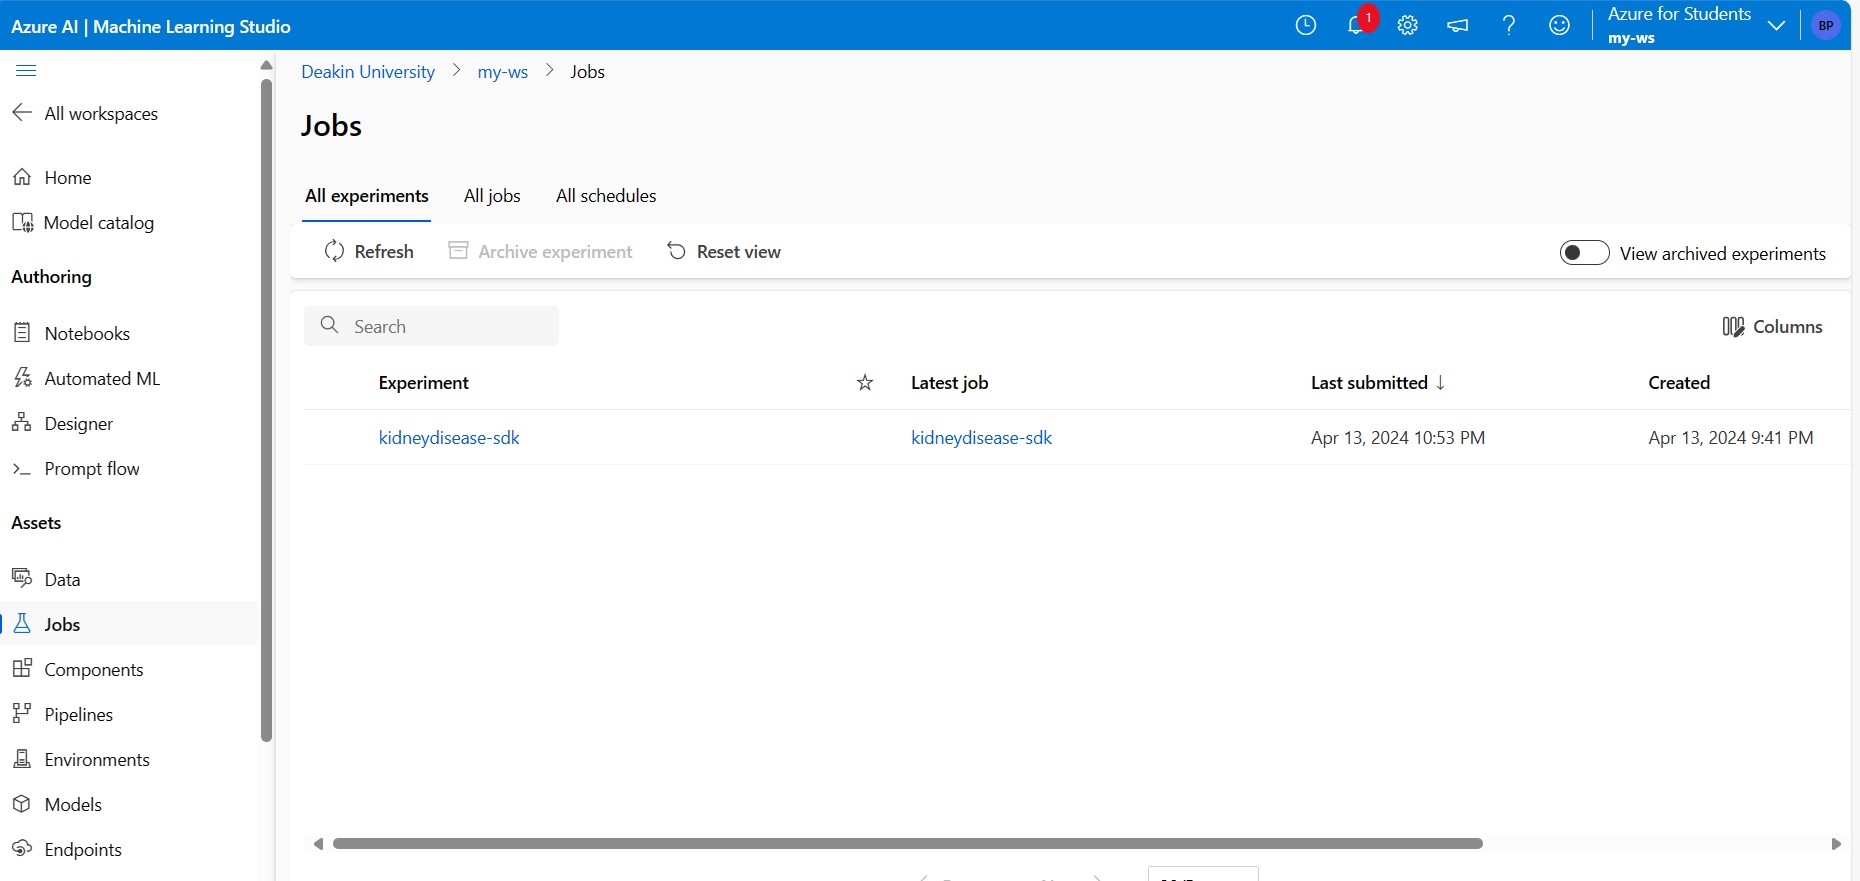

In [59]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP1.jpg')

1. On opening the link, you will see the experiment defined above.
2. The experiment name will be the same as defined above.
3. Each run will be displayed by a random name.
4. Click on a run to view the metrics and output files generated.

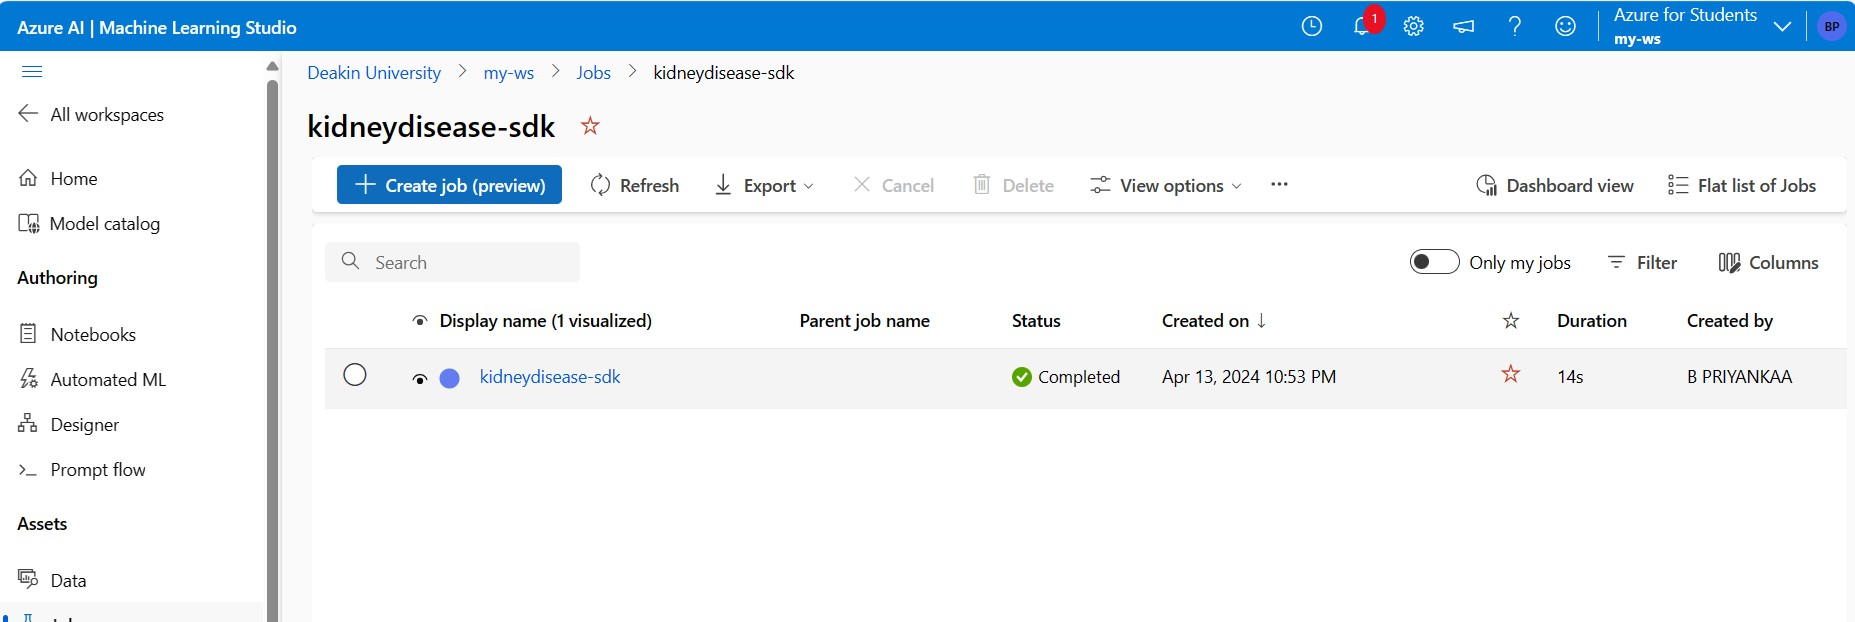

In [60]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP2.jpg')

#### Clicking on the run name will show you the overview of the same. Among other things, it will show the status of the job and the metrics calculated.

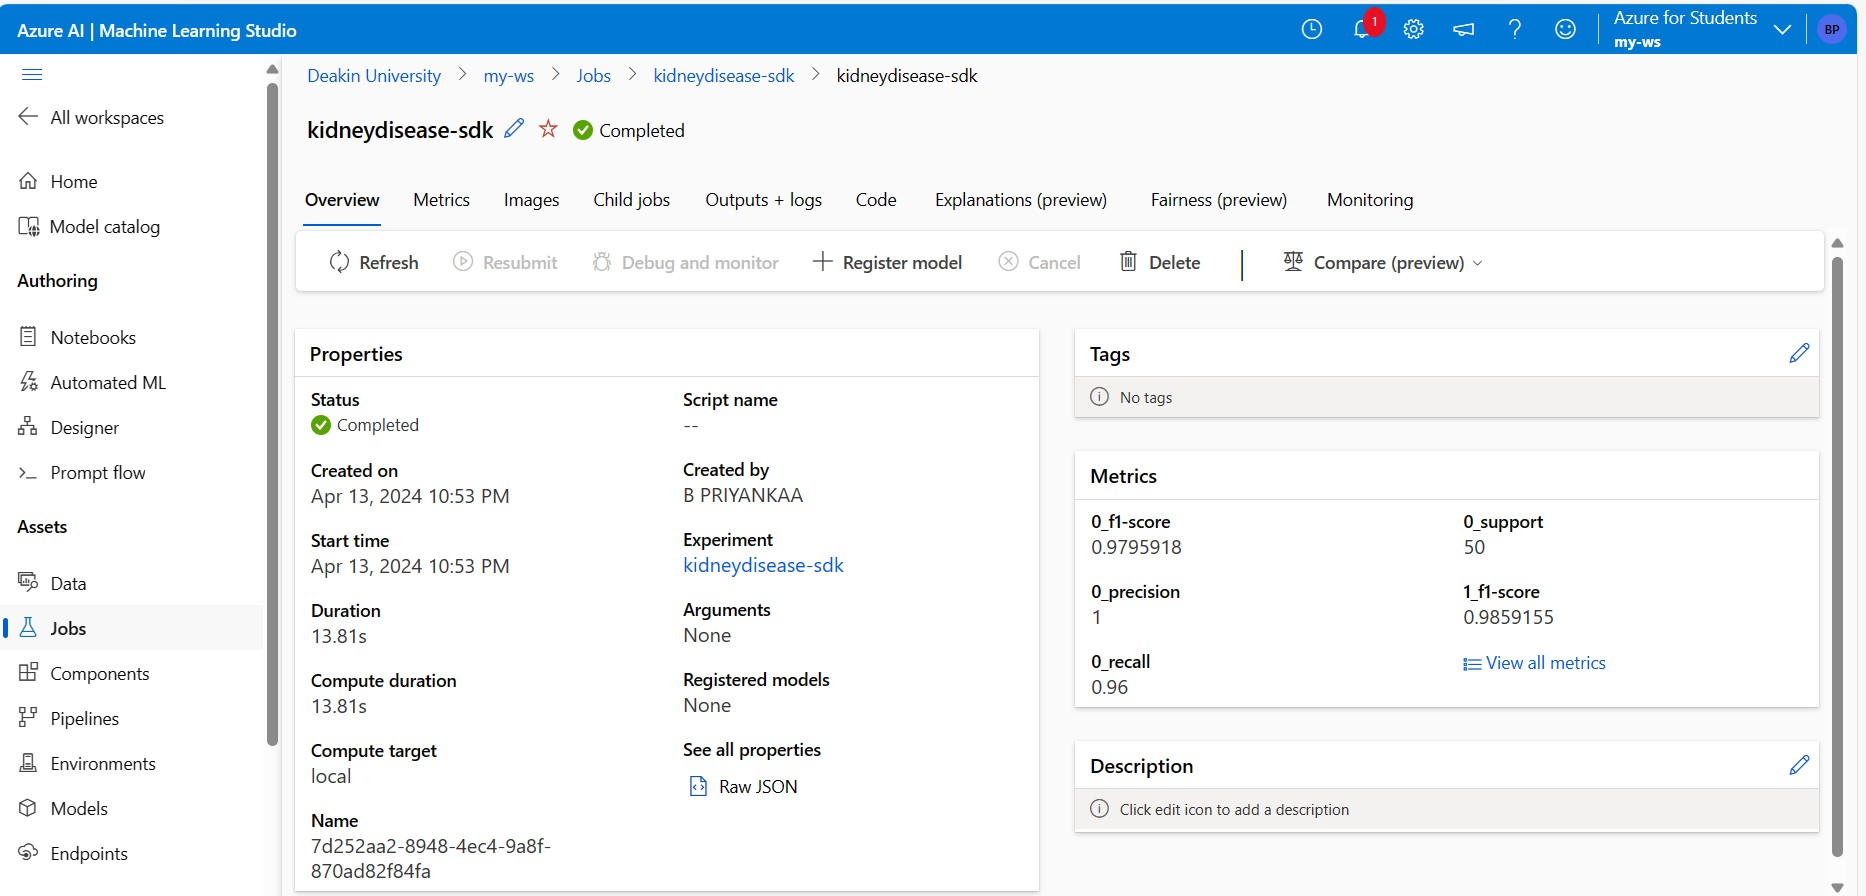

In [61]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP3.jpg')

### To view the output files, go to the 'Output + logs' tab.

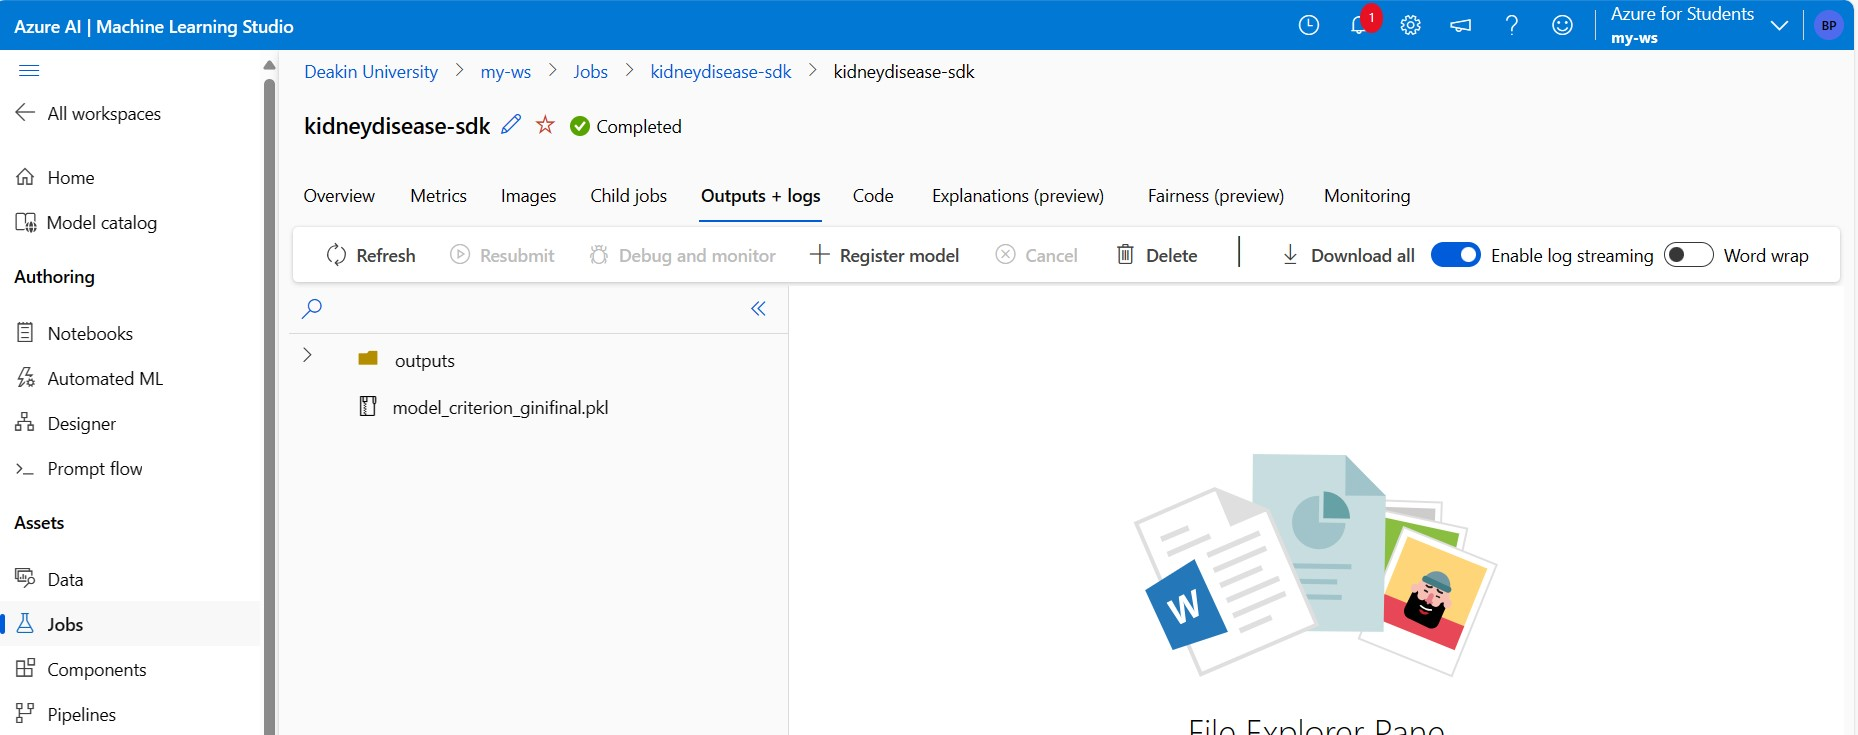

In [62]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP4.jpg')

### To view the model metrics, go to the 'Metrics' tab.

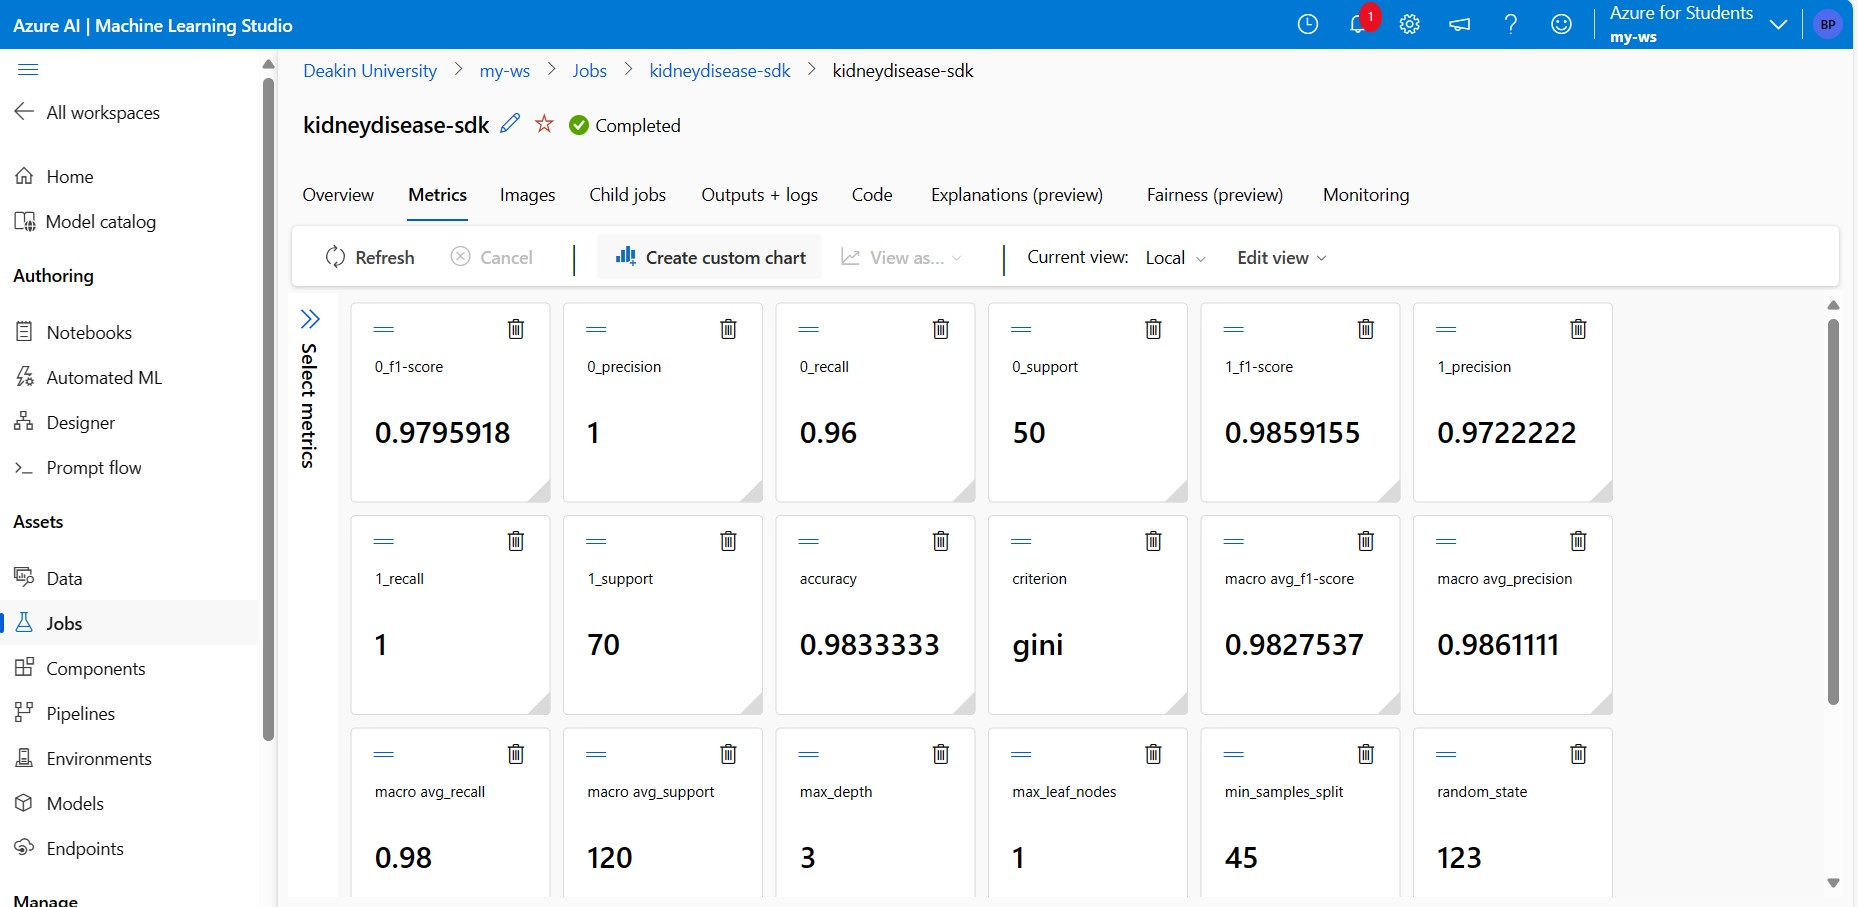

In [64]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\EXP5.jpg')

### Create handle to workspace

Before we dive in the code, you need a way to reference your workspace. You'll create `ml_client` for a handle to the workspace.  You'll then use `ml_client` to manage resources and jobs.

In the next cell, enter your Subscription ID, Resource Group name and Workspace name. To find these values:

1. In the upper right Azure Machine Learning studio toolbar, select your workspace name.
1. Copy the value for workspace, resource group and subscription ID into the code.
1. You'll need to copy one value, close the area and paste, then come back for the next one.

### Here we are providing the path at which the trained model is saved in our local system to register it

In [65]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

In [66]:
resource_name = "rg-t3"
workspace = "my-ws"
subscription_id = "b8b04be1-8ca0-496a-bed6-50c58c15784d"

ml_client = MLClient(credential = credential, workspace_name = "task3-ws", subscription_id = "b8b04be1-8ca0-496a-bed6-50c58c15784d", resource_group_name = "task3-rg")

In [67]:
from azureml.core import Workspace, Model

ws = Workspace.from_config()

model = Model.register(workspace = ws, model_path = "C:\\Users\\Priyankaa B\\outputs\\model_criterion_ginifinal.pkl", model_name = "ckd_model1")

Registering model ckd_model1


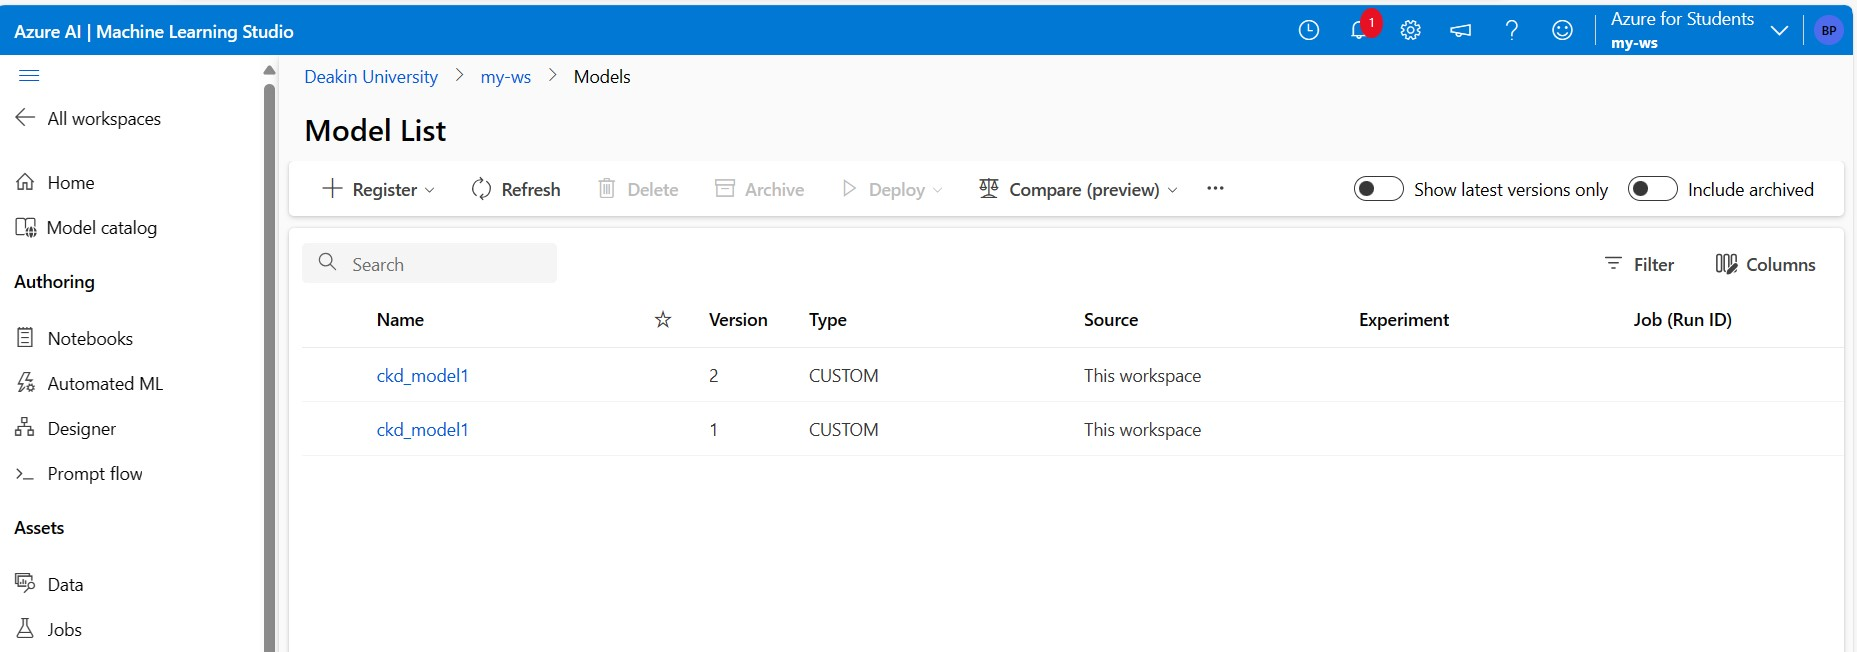

In [68]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\Model3.jpg')

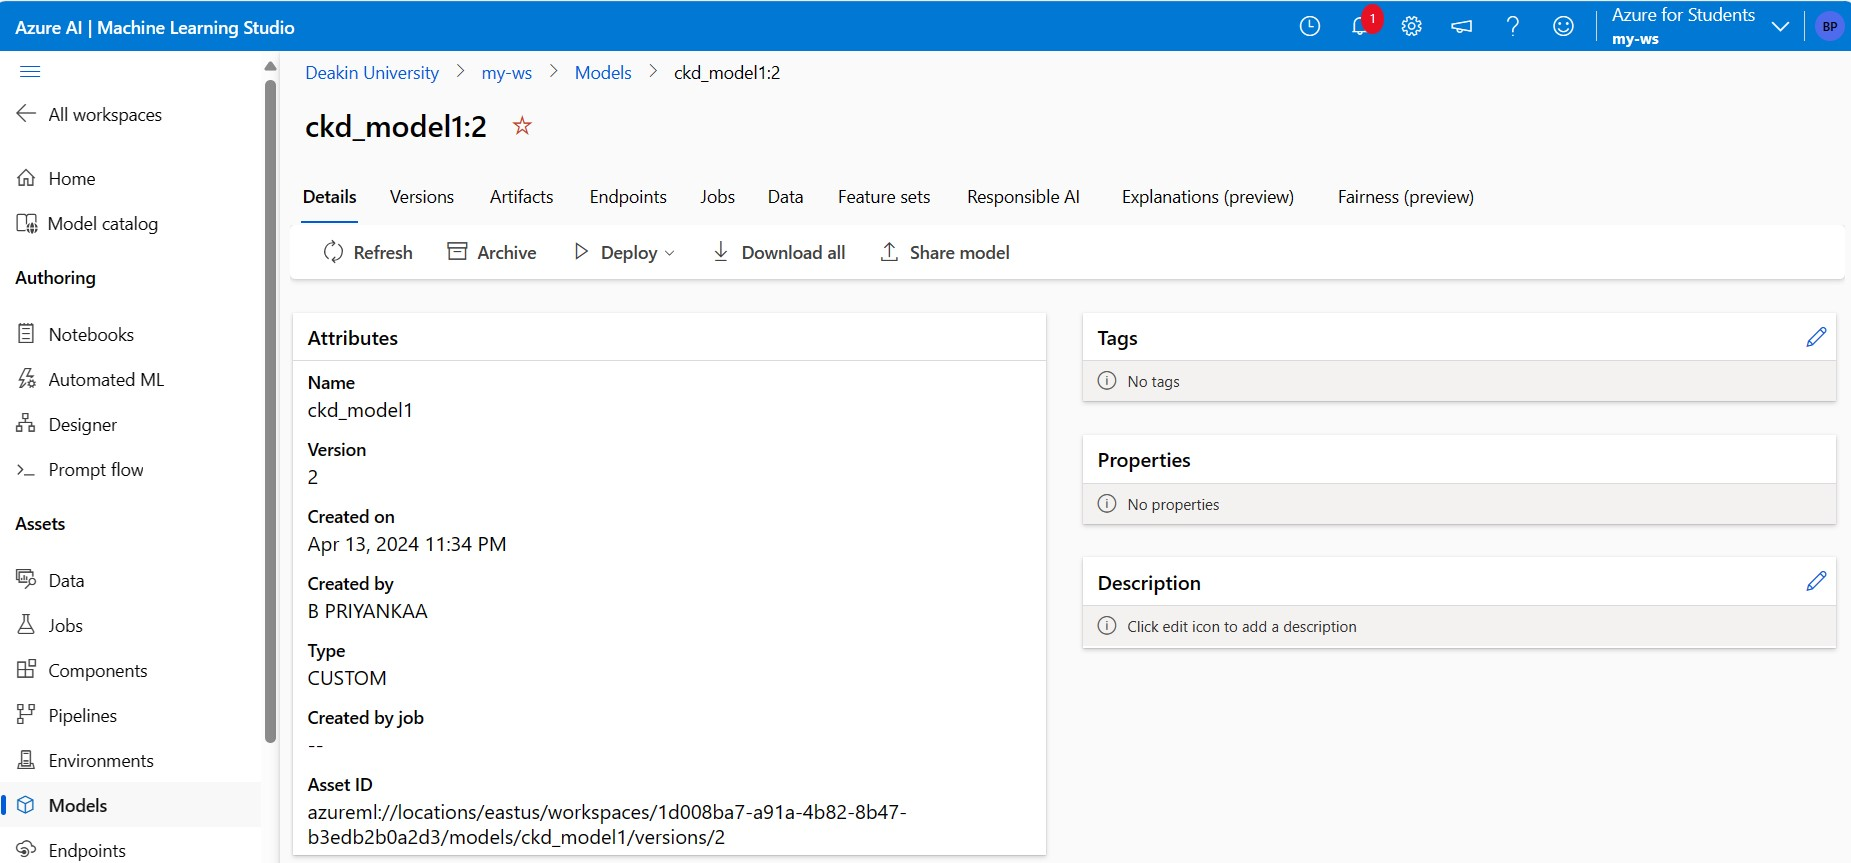

In [71]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\Model4.jpg')

## Model Deployment

### Confirm that the model is registered

You can check the **Models** page in [Azure Machine Learning studio](https://ml.azure.com/) to identify the latest version of your registered model.


Alternatively, the code below will retrieve the latest version number for you to use.

### Endpoints and deployments

After you train a machine learning model, you need to deploy it so that others can use it for inferencing. For this purpose, Azure Machine Learning allows you to create **endpoints** and add **deployments** to them.

An **endpoint**, in this context, is an HTTPS path that provides an interface for clients to send requests (input data) to a trained model and receive the inferencing (scoring) results back from the model. An endpoint provides:

- Authentication using "key or token" based auth 
- [TLS(SSL)](https://simple.wikipedia.org/wiki/Transport_Layer_Security) termination
- A stable scoring URI (endpoint-name.region.inference.ml.azure.com)


A **deployment** is a set of resources required for hosting the model that does the actual inferencing. 

A single endpoint can contain multiple deployments. Endpoints and deployments are independent Azure Resource Manager resources that appear in the Azure portal.

Azure Machine Learning allows you to implement [online endpoints](https://learn.microsoft.com/en-us/azure/machine-learning/concept-endpoints#what-are-online-endpoints) for real-time inferencing on client data, and [batch endpoints](https://learn.microsoft.com/en-us/azure/machine-learning/concept-endpoints#what-are-batch-endpoints) for inferencing on large volumes of data over a period of time. 

In this tutorial, we'll walk you through the steps of implementing a _managed online endpoint_. Managed online endpoints work with powerful CPU and GPU machines in Azure in a scalable, fully managed way that frees you from the overhead of setting up and managing the underlying deployment infrastructure.

### Create an online endpoint

Now that you have a registered model, it's time to create your online endpoint. The endpoint name needs to be unique in the entire Azure region. For this tutorial, you'll create a unique name using a universally unique identifier [`UUID`](https://en.wikipedia.org/wiki/Universally_unique_identifier). For more information on the endpoint naming rules, see [managed online endpoint limits](https://learn.microsoft.com/en-us/azure/machine-learning/how-to-manage-quotas#azure-machine-learning-managed-online-endpoints).

In [72]:
import uuid

# Create a unique name for the endpoint
online_endpoint_name = "ckd-endpoint-" + str(uuid.uuid4())[:8]

In [73]:
from azure.ai.ml.entities import ManagedOnlineEndpoint

# define an online endpoint
endpoint = ManagedOnlineEndpoint(
    name=online_endpoint_name,
    description="this is an online endpoint",
    auth_mode="key",
    tags={
        "training_dataset": "classifications_defaults",
    },
)

### Understanding online deployments

The key aspects of a deployment include:

- `name` - Name of the deployment.
- `endpoint_name` - Name of the endpoint that will contain the deployment.
- `model` - The model to use for the deployment. This value can be either a reference to an existing versioned model in the workspace or an inline model specification.
- `environment` - The environment to use for the deployment (or to run the model). This value can be either a reference to an existing versioned environment in the workspace or an inline environment specification. The environment can be a Docker image with Conda dependencies or a Dockerfile.
- `code_configuration` - the configuration for the source code and scoring script.
    - `path`- Path to the source code directory for scoring the model.
    - `scoring_script` - Relative path to the scoring file in the source code directory. This script executes the model on a given input request. For an example of a scoring script, see [Understand the scoring script](https://learn.microsoft.com/azure/machine-learning/how-to-deploy-online-endpoints#understand-the-scoring-script) in the "Deploy an ML model with an online endpoint" article.
- `instance_type` - The VM size to use for the deployment. For the list of supported sizes, see [Managed online endpoints SKU list](https://learn.microsoft.com/azure/machine-learning/reference-managed-online-endpoints-vm-sku-list).
- `instance_count` - The number of instances to use for the deployment.
    
### Deployment using an MLflow model

Azure Machine Learning supports no-code deployment of a model created and logged with MLflow. This means that you don't have to provide a scoring script or an environment during model deployment, as the scoring script and environment are automatically generated when training an MLflow model. If you were using a custom model, though, you'd have to specify the environment and scoring script during deployment.

> [!IMPORTANT]
> If you typically deploy models using scoring scripts and custom environments and want to achieve the same functionality using MLflow models, we recommend reading [Using MLflow models for no-code deployment](https://learn.microsoft.com/azure/machine-learning/how-to-deploy-mlflow-models).

In [ ]:
from azure.ai.ml.entities import ManagedOnlineEndpoint

# define an online endpoint
endpoint = ManagedOnlineEndpoint(
    name=online_endpoint_name,
    description="this is an online endpoint",
    auth_mode="key",
    tags={
        "training_dataset": "credit_defaults",
    },
)

In [ ]:
# create the online endpoint
# expect the endpoint to take approximately 2 minutes.

endpoint = ml_client.online_endpoints.begin_create_or_update(endpoint).result()

In [ ]:
endpoint = ml_client.online_endpoints.get(name=online_endpoint_name)

print(
    f'Endpoint "{endpoint.name}" with provisioning state "{endpoint.provisioning_state}" is retrieved'
)

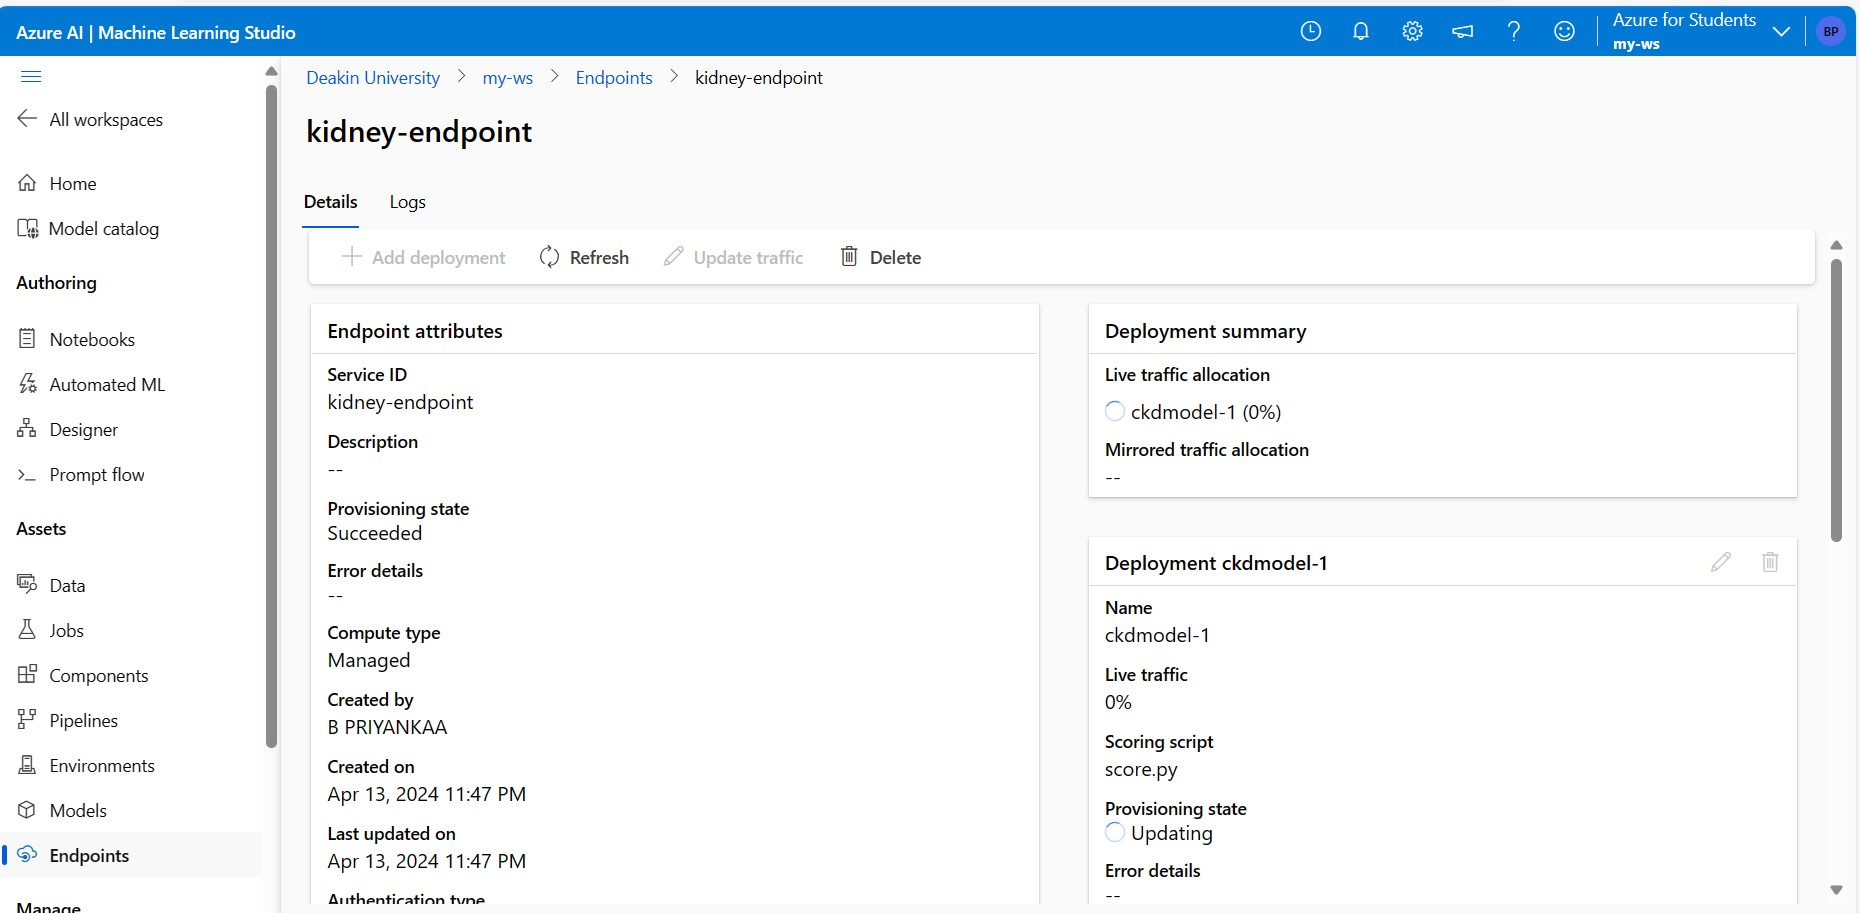

In [77]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\ED3.jpg')

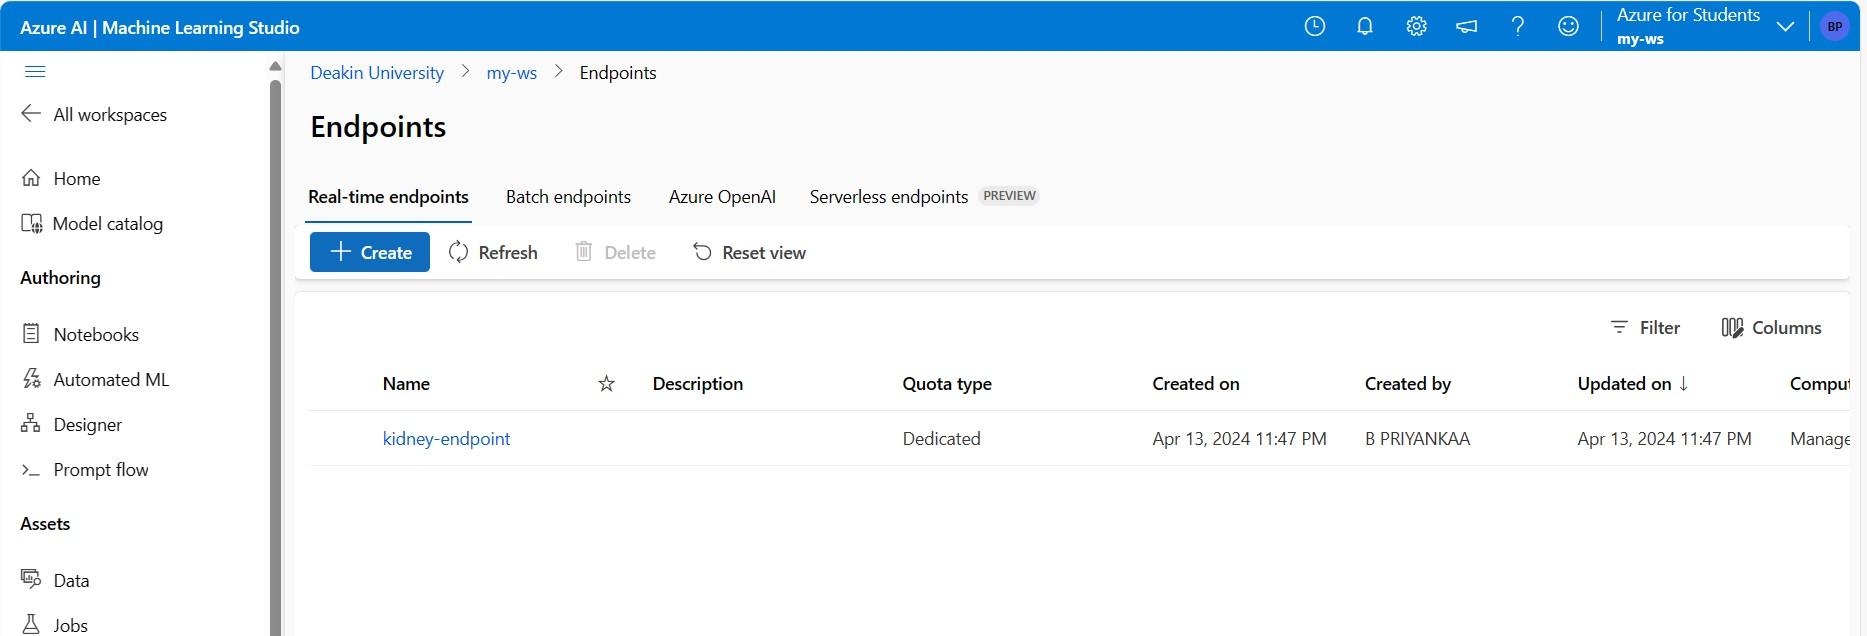

In [80]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\ED5.jpg')

## Endpoint Created.

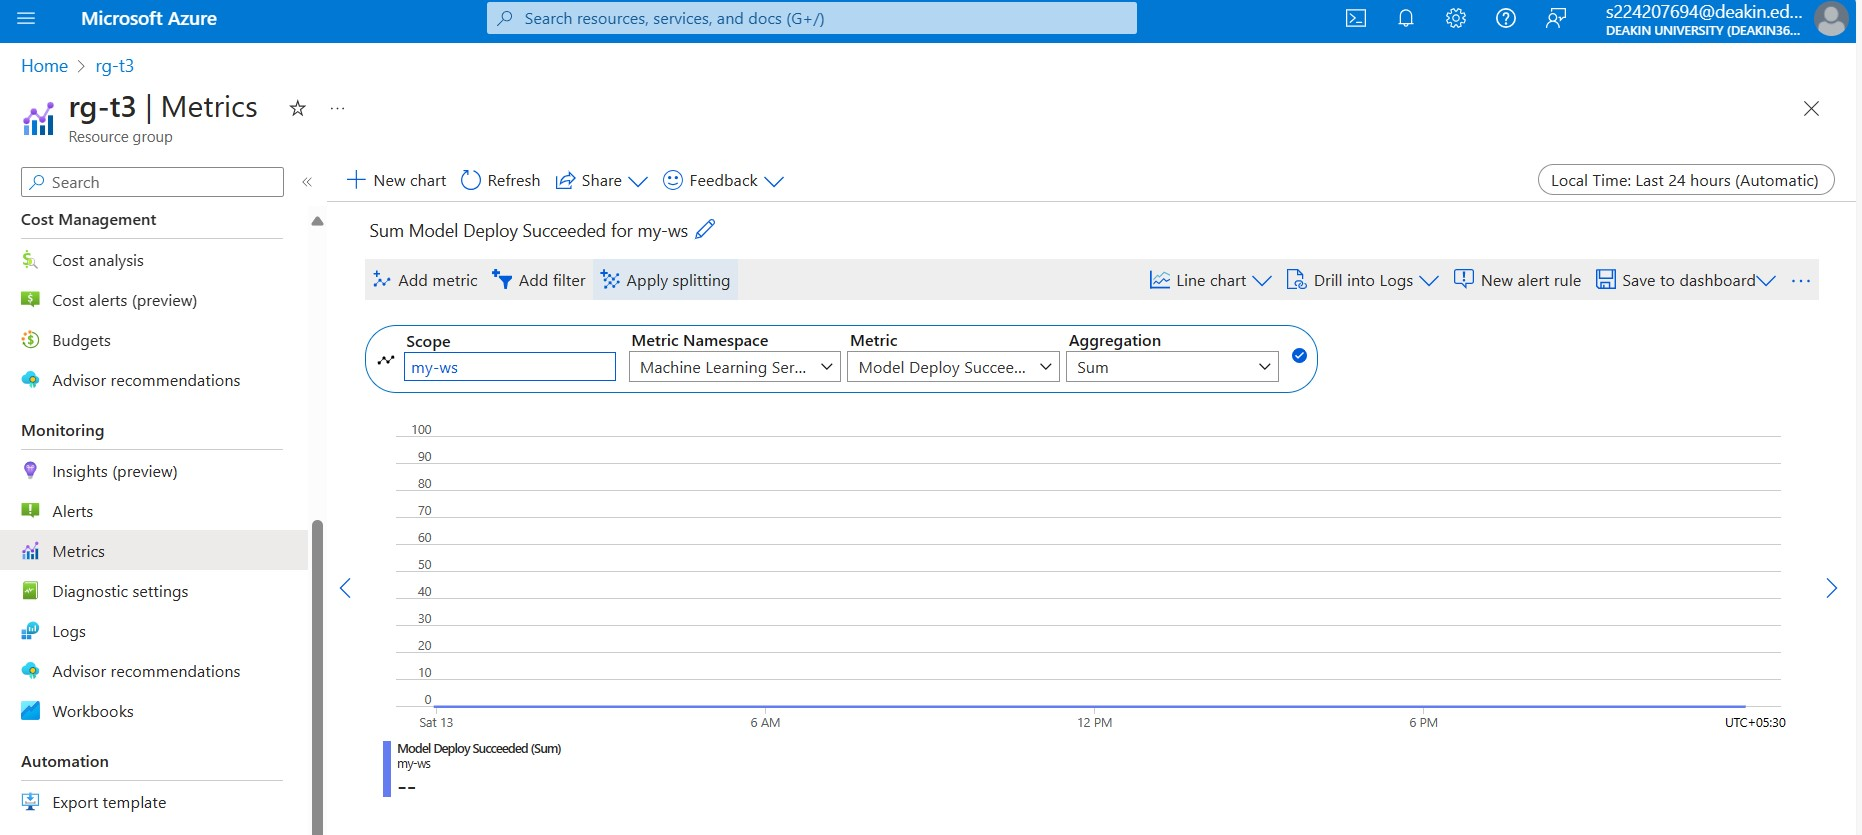

In [79]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\Del2.jpg')

## Closing the Project

### Delete the resources
You can retain an **empty** resource group as it will not charge credits. However, all the resources that have been created, have to be diligently deleted to avoid incurring extra costs.

For simpler closing operations, delete the entire resource group. To keep the same resource group, delete all the resources contained within it.

Refresh the page, until all the resources have been deleted.

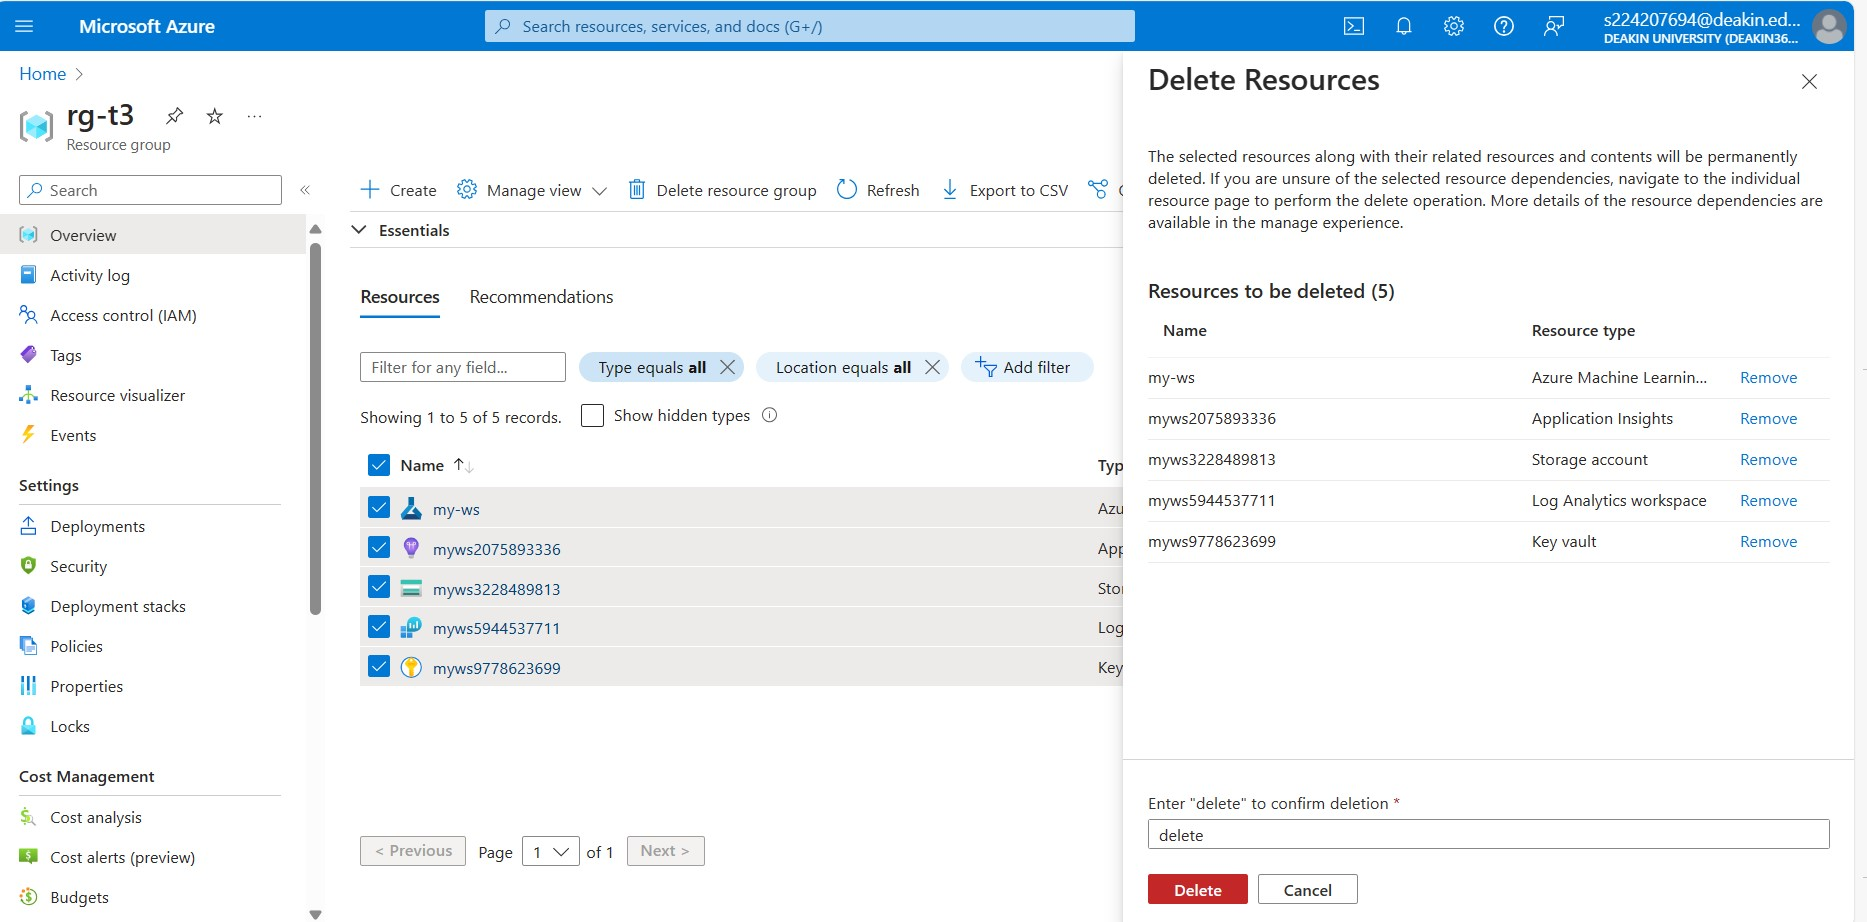

In [78]:
img('C:\\Users\\Priyankaa B\\TASK_3_INPUTS\\Del.jpg')